<a href="https://colab.research.google.com/github/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/blob/main/MRV_AGC_ML_Model_Country_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**  
The goal is to produce accurate, scalable, and reproducible carbon stock estimates to support countries’ Measurement, Reporting, and Verification (MRV) obligations under climate agreements.

**Project Overview:**  
The degradation of mangrove ecosystems across Latin America and the Caribbean (LAC) presents a significant challenge for climate mitigation and blue carbon preservation. However, current national capacities to measure and report on mangrove carbon stocks, particularly above-ground biomass (AGB) and soil organic carbon (SOC), are often limited by data availability, inconsistent methodologies, and lack of scalable digital tools. **The problem is how to develop a standardized, scalable, and validated AI-driven MRV system for mangrove ecosystems that can produce reliable blue carbon stock estimates**, support international reporting obligations, and enable sustainable blue carbon management in Latin America and the Caribbean. This consultancy also contributes to preparing countries for results-based payment schemes by producing standardized carbon estimates aligned with carbon credit market verification. While the core focus is on AGB estimation, methane data and modelling processes, when provided, will be integrated to enhance blue carbon stock accuracy.  

**The project will use machine learning methods trained on high-resolution satellite data, LiDAR, field plots, and other auxiliary sources** to produce validated, country-specific models. By piloting in Trinidad and scaling to Columbia, Jamaica, Panama, and Suriname, this initiative will enhance national reporting systems, support access to results-based climate finance, and build regional capacity for sustainable carbon monitoring. It directly contributes to climate reporting obligations under the Paris Agreement, while enabling future alignment with carbon credit verification standards.

Import data  
Prep data (join, impute, clean, etc)
Explore data   
Train model  
Test model  
Produce visuals

# **Colombia Data & Model**

## 1. Import processed data from Github repo for Colombia

---

In [ ]:
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Colombia/02_interim/Colombia_S1_Predictors_2022_2023.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Colombia/02_interim/Colombia_S2_Predictors_2022_2023.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Colombia/02_interim/Colombia_plot_AGB_AGC_Chave2014.xlsx

--2026-01-13 00:30:02--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Colombia/02_interim/Colombia_S1_Predictors_2022_2023.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6916 (6.8K) [application/octet-stream]
Saving to: ‘Colombia_S1_Predictors_2022_2023.xlsx.2’

Colombia_S1_Predict 100%[===================>]   6.75K  --.-KB/s    in 0s      

2026-01-13 00:30:02 (64.9 MB/s) - ‘Colombia_S1_Predictors_2022_2023.xlsx.2’ saved [6916/6916]

--2026-01-13 00:30:03--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Colombia/02_interim/Colombia_S2_Predictors_2022_2023.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 

In [ ]:
import pandas as pd

col_s1_pred_df = pd.read_excel('/content/Colombia_S1_Predictors_2022_2023.xlsx')
col_s2_pred_df = pd.read_excel('/content/Colombia_S2_Predictors_2022_2023.xlsx')
col_plot_df = pd.read_excel('/content/Colombia_plot_AGB_AGC_Chave2014.xlsx')

print("All Excel files have been loaded into DataFrames:")
print("col_s1_pred_df, col_s2_pred_df, col_plot_df")

All Excel files have been loaded into DataFrames:
col_s1_pred_df, col_s2_pred_df, col_plot_df


In [ ]:
print("Colombia S1 Predictors 2022 2023 Info:")
col_s1_pred_df.info()
print("\nColombia S1 Predictors DataFrame 2022 2023 Info:")
display(col_s1_pred_df.describe())

print("Colombia S2 Predictors 2022 2023 Info:")
col_s2_pred_df.info()
print("\nColombia S2 Predictors 2022 2023 DataFrame Description:")
display(col_s2_pred_df.describe())


print("Colombia Plot AGB AGC Chave2014 DataFrame Info:")
col_plot_df.info()
print("\nColombia Plot AGB AGC Chave2014  DataFrame Description:")
display(col_plot_df.describe())

Colombia S1 Predictors 2022 2023 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  14 non-null     int64  
 1   Latitude      14 non-null     float64
 2   Longitude     14 non-null     float64
 3   Plot          14 non-null     object 
 4   Study_area    14 non-null     object 
 5   VH            14 non-null     float64
 6   VH_VV_ratio   14 non-null     float64
 7   VV            14 non-null     float64
 8   VV_minus_VH   14 non-null     float64
 9   .geo          14 non-null     object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.2+ KB

Colombia S1 Predictors DataFrame 2022 2023 Info:


,system:index,Latitude,Longitude,VH,VH_VV_ratio,VV,VV_minus_VH
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6.5000,9.411235,-75.634360,-14.023681,1.847316,-7.713321,6.344930
std,4.1833,0.014699,0.012770,0.428797,0.137105,0.659795,0.396044
min,0.0000,9.392361,-75.656792,-14.545701,1.638090,-8.933878,5.647963
25%,3.2500,9.401521,-75.641015,-14.319607,1.763200,-7.941399,6.120765
50%,6.5000,9.408647,-75.633374,-14.003779,1.837804,-7.621978,6.300250
75%,9.7500,9.418269,-75.623428,-13.930117,1.889189,-7.526474,6.532688
max,13.0000,9.444222,-75.618083,-12.739493,2.224207,-5.999545,7.108129


Colombia S2 Predictors 2022 2023 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  14 non-null     int64  
 1   B11           14 non-null     float64
 2   B12           14 non-null     float64
 3   B2            14 non-null     float64
 4   B3            14 non-null     float64
 5   B4            14 non-null     float64
 6   B5            14 non-null     float64
 7   B6            14 non-null     float64
 8   B7            14 non-null     float64
 9   B8            14 non-null     float64
 10  B8A           14 non-null     float64
 11  EVI           14 non-null     float64
 12  Latitude      14 non-null     float64
 13  Longitude     14 non-null     float64
 14  NDRE          14 non-null     float64
 15  NDVI          14 non-null     float64
 16  NDWI          14 non-null     float64
 17  Plot          14 non-null     object

,system:index,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,EVI,Latitude,Longitude,NDRE,NDVI,NDWI
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,6.5000,0.110014,0.046186,0.033414,0.050141,0.030775,0.082441,0.240061,0.300575,0.297875,0.329002,0.516585,9.411235,-75.634360,0.556278,0.792211,-0.692699
std,4.1833,0.009888,0.007292,0.003120,0.003761,0.004069,0.004711,0.016570,0.021823,0.024164,0.022768,0.040229,0.014699,0.012770,0.027383,0.034409,0.028161
min,0.0000,0.094500,0.036800,0.028800,0.042500,0.025300,0.076550,0.208750,0.255350,0.245100,0.282150,0.426469,9.392361,-75.656792,0.496578,0.719480,-0.738366
25%,3.2500,0.103338,0.040275,0.031275,0.047575,0.027850,0.078713,0.228662,0.288137,0.284675,0.320325,0.491393,9.401521,-75.641015,0.538067,0.778276,-0.709947
50%,6.5000,0.106600,0.043300,0.032400,0.049825,0.029675,0.081275,0.246125,0.306350,0.302850,0.334700,0.522705,9.408647,-75.633374,0.555113,0.787732,-0.693418
75%,9.7500,0.117463,0.052613,0.036025,0.053150,0.033963,0.085125,0.251200,0.315300,0.313700,0.342831,0.539594,9.418269,-75.623428,0.577916,0.820342,-0.672777
max,13.0000,0.124350,0.057100,0.038250,0.055950,0.039350,0.091450,0.264500,0.335200,0.327200,0.364550,0.579331,9.444222,-75.618083,0.604333,0.839022,-0.643662


Colombia Plot AGB AGC Chave2014 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Plot                      14 non-null     object 
 1   Study_area                14 non-null     object 
 2   Latitude                  14 non-null     float64
 3   Longitude                 14 non-null     float64
 4   AGBd_kg_per_ha            14 non-null     float64
 5   AGBd_t_per_ha_chave2014   14 non-null     float64
 6   AGCd_tC_per_ha_chave2014  14 non-null     float64
dtypes: float64(5), object(2)
memory usage: 916.0+ bytes

Colombia Plot AGB AGC Chave2014  DataFrame Description:


,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,9.411235,-75.634360,128405.491956,128.405492,60.350581
std,0.014699,0.012770,77606.548007,77.606548,36.475078
min,9.392361,-75.656792,66603.472264,66.603472,31.303632
25%,9.401521,-75.641015,96685.065672,96.685066,45.441981
50%,9.408647,-75.633374,108395.402522,108.395403,50.945839
75%,9.418269,-75.623428,124795.277006,124.795277,58.653780
max,9.444222,-75.618083,375835.122850,375.835123,176.642508


In [ ]:
display(col_s1_pred_df.head())
display(col_s2_pred_df.head())
display(col_plot_df.head())


,system:index,Latitude,Longitude,Plot,Study_area,VH,VH_VV_ratio,VV,VV_minus_VH,.geo
0,0,9.410258,-75.622394,Caimanera P10,Caimanera,-13.927540,1.765943,-7.911034,5.910434,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,9.405389,-75.655378,Caimanera P11,Caimanera,-14.336914,1.739304,-8.359852,5.946622,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,9.396867,-75.641917,Caimanera P12,Caimanera,-14.330285,1.638090,-8.933878,5.647963,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,9.401303,-75.632144,Caimanera P13,Caimanera,-14.412853,1.960792,-7.505751,6.556708,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,9.402175,-75.656792,Caimanera P14,Caimanera,-13.872831,1.762286,-7.951520,6.090550,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


,system:index,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,EVI,Latitude,Longitude,NDRE,NDVI,NDWI,Plot,Study_area,.geo
0,0,0.11675,0.05270,0.03580,0.05595,0.03540,0.09145,0.23935,0.29510,0.3030,0.32425,0.530022,9.410258,-75.622394,0.531830,0.779148,-0.674684,Caimanera P10,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
1,1,0.11595,0.05075,0.03080,0.04745,0.03025,0.08025,0.22520,0.28200,0.2717,0.31340,0.480890,9.405389,-75.655378,0.537678,0.786892,-0.688529,Caimanera P11,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
2,2,0.12175,0.05710,0.03790,0.05345,0.03935,0.08080,0.20875,0.25535,0.2451,0.28215,0.426469,9.396867,-75.641917,0.496578,0.719480,-0.643662,Caimanera P12,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
3,3,0.10225,0.03985,0.03235,0.04740,0.02960,0.07845,0.24725,0.31630,0.3073,0.34500,0.518850,9.401303,-75.632144,0.579528,0.788571,-0.698307,Caimanera P13,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."
4,4,0.12435,0.05345,0.03610,0.05380,0.03385,0.08445,0.23125,0.28715,0.2945,0.31990,0.483964,9.402175,-75.656792,0.550188,0.777985,-0.663404,Caimanera P14,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper..."


,Plot,Study_area,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
0,Caimanera P10,Caimanera,9.410258,-75.622394,107947.135025,107.947135,50.735153
1,Caimanera P11,Caimanera,9.405389,-75.655378,76199.462781,76.199463,35.813748
2,Caimanera P12,Caimanera,9.396867,-75.641917,145465.880608,145.465881,68.368964
3,Caimanera P13,Caimanera,9.401303,-75.632144,109155.240827,109.155241,51.302963
4,Caimanera P14,Caimanera,9.402175,-75.656792,186442.110115,186.442110,87.627792


In [ ]:
print(f"col_s1_pred_df: {col_s1_pred_df.shape[0]} rows x {col_s1_pred_df.shape[1]} columns")
print(f"col_s2_pred_df: {col_s2_pred_df.shape[0]} rows x {col_s2_pred_df.shape[1]} columns")
print(f"col_plot_df: {col_plot_df.shape[0]} rows x {col_plot_df.shape[1]} columns")


col_s1_pred_df: 14 rows x 10 columns
col_s2_pred_df: 14 rows x 20 columns
col_plot_df: 14 rows x 7 columns


## 2. Clean  & Prep Data

---

In [ ]:
if not col_s1_pred_df['Plot'].is_unique:
    print("Warning: 'Plot' column in col_s1_pred_df is not unique. Please investigate before merging.")
if not col_s2_pred_df['Plot'].is_unique:
    print("Warning: 'Plot' column in col_s2_pred_df is not unique. Please investigate before merging.")
if not col_plot_df['Plot'].is_unique:
    print("Warning: 'Plot' column in col_plot_df is not unique. Please investigate before merging.")

# Merge col_s1_pred_df and col_s2_pred_df on 'Plot'
colombia_df = pd.merge(col_s1_pred_df, col_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))

# Merge the result with col_plot_df on 'Plot'
colombia_df = pd.merge(colombia_df, col_plot_df, on='Plot', how='inner')

print("Merged Colombia DataFrame Info:")
colombia_df.info()
print("\nMerged Colombia DataFrame Head:")
display(colombia_df.head())

# Verify the shape of the merged dataframe
print(f"\nMerged Colombia DataFrame shape: {colombia_df.shape[0]} rows x {colombia_df.shape[1]} columns")

# Set AGCd_tC_per_ha_chave2014 as the dependent variable (this is a conceptual step, not a code assignment)
dependent_variable = 'AGCd_tC_per_ha_chave2014'
print(f"\nThe dependent variable for modeling is: {dependent_variable}")

Merged Colombia DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system:index_s1           14 non-null     int64  
 1   Latitude_s1               14 non-null     float64
 2   Longitude_s1              14 non-null     float64
 3   Plot                      14 non-null     object 
 4   Study_area_s1             14 non-null     object 
 5   VH                        14 non-null     float64
 6   VH_VV_ratio               14 non-null     float64
 7   VV                        14 non-null     float64
 8   VV_minus_VH               14 non-null     float64
 9   .geo_s1                   14 non-null     object 
 10  system:index_s2           14 non-null     int64  
 11  B11                       14 non-null     float64
 12  B12                       14 non-null     float64
 13  B2                        14 non-nu

,system:index_s1,Latitude_s1,Longitude_s1,Plot,Study_area_s1,VH,VH_VV_ratio,VV,VV_minus_VH,.geo_s1,...,NDVI,NDWI,Study_area_s2,.geo_s2,Study_area,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
0,0,9.410258,-75.622394,Caimanera P10,Caimanera,-13.927540,1.765943,-7.911034,5.910434,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",...,0.779148,-0.674684,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Caimanera,9.410258,-75.622394,107947.135025,107.947135,50.735153
1,1,9.405389,-75.655378,Caimanera P11,Caimanera,-14.336914,1.739304,-8.359852,5.946622,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",...,0.786892,-0.688529,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Caimanera,9.405389,-75.655378,76199.462781,76.199463,35.813748
2,2,9.396867,-75.641917,Caimanera P12,Caimanera,-14.330285,1.638090,-8.933878,5.647963,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",...,0.719480,-0.643662,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Caimanera,9.396867,-75.641917,145465.880608,145.465881,68.368964
3,3,9.401303,-75.632144,Caimanera P13,Caimanera,-14.412853,1.960792,-7.505751,6.556708,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",...,0.788571,-0.698307,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Caimanera,9.401303,-75.632144,109155.240827,109.155241,51.302963
4,4,9.402175,-75.656792,Caimanera P14,Caimanera,-13.872831,1.762286,-7.951520,6.090550,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",...,0.777985,-0.663404,Caimanera,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Caimanera,9.402175,-75.656792,186442.110115,186.442110,87.627792



Merged Colombia DataFrame shape: 14 rows x 35 columns

The dependent variable for modeling is: AGCd_tC_per_ha_chave2014


## 03. Train & Test ML Models

---



Clean and prepare the `colombia_df` by removing unnecessary and redundant columns, and then split the data into features (X) and target (y = 'AGCd_tC_per_ha_chave2014') for machine learning.

In [ ]:
columns_to_drop_colombia = [
    'system:index_s1',
    'system:index_s2',
    'Plot',
    '.geo_s1',
    '.geo_s2',
    'Latitude_s1',
    'Longitude_s1',
    'Latitude_s2',
    'Longitude_s2',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014'
]

# Create a cleaned DataFrame by dropping identified columns
colombia_df_cleaned = colombia_df.drop(columns=columns_to_drop_colombia)

print("--- Colombia Cleaned DataFrame Info ---")
colombia_df_cleaned.info()
print("\n--- Colombia Cleaned DataFrame Head ---")
display(colombia_df_cleaned.head())

# Verify unique values of 'Study_area'
print("\nUnique values in 'Study_area' column:")
print(colombia_df_cleaned['Study_area'].unique())

# Drop the redundant 'Study_area' columns
colombia_df_cleaned = colombia_df_cleaned.drop(columns=['Study_area_s1', 'Study_area_s2', 'Study_area'])


--- Colombia Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Study_area_s1             14 non-null     object 
 1   VH                        14 non-null     float64
 2   VH_VV_ratio               14 non-null     float64
 3   VV                        14 non-null     float64
 4   VV_minus_VH               14 non-null     float64
 5   B11                       14 non-null     float64
 6   B12                       14 non-null     float64
 7   B2                        14 non-null     float64
 8   B3                        14 non-null     float64
 9   B4                        14 non-null     float64
 10  B5                        14 non-null     float64
 11  B6                        14 non-null     float64
 12  B7                        14 non-null     float64
 13  B8                        1

,Study_area_s1,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,...,B8A,EVI,NDRE,NDVI,NDWI,Study_area_s2,Study_area,Latitude,Longitude,AGCd_tC_per_ha_chave2014
0,Caimanera,-13.927540,1.765943,-7.911034,5.910434,0.11675,0.05270,0.03580,0.05595,0.03540,...,0.32425,0.530022,0.531830,0.779148,-0.674684,Caimanera,Caimanera,9.410258,-75.622394,50.735153
1,Caimanera,-14.336914,1.739304,-8.359852,5.946622,0.11595,0.05075,0.03080,0.04745,0.03025,...,0.31340,0.480890,0.537678,0.786892,-0.688529,Caimanera,Caimanera,9.405389,-75.655378,35.813748
2,Caimanera,-14.330285,1.638090,-8.933878,5.647963,0.12175,0.05710,0.03790,0.05345,0.03935,...,0.28215,0.426469,0.496578,0.719480,-0.643662,Caimanera,Caimanera,9.396867,-75.641917,68.368964
3,Caimanera,-14.412853,1.960792,-7.505751,6.556708,0.10225,0.03985,0.03235,0.04740,0.02960,...,0.34500,0.518850,0.579528,0.788571,-0.698307,Caimanera,Caimanera,9.401303,-75.632144,51.302963
4,Caimanera,-13.872831,1.762286,-7.951520,6.090550,0.12435,0.05345,0.03610,0.05380,0.03385,...,0.31990,0.483964,0.550188,0.777985,-0.663404,Caimanera,Caimanera,9.402175,-75.656792,87.627792



Unique values in 'Study_area' column:
['Caimanera']


Since the 'Study_area' column in `colombia_df_cleaned` has only one unique value ('Caimanera'), it is redundant and is dropped along with 'Study_area_s1' and 'Study_area_s2'.

After dropping these, the features (X) and the target variable (y) are defined and then split the data into training and testing sets using `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = colombia_df_cleaned['AGCd_tC_per_ha_chave2014']

# Define the features (all columns except the target)
X = colombia_df_cleaned.drop(columns=['AGCd_tC_per_ha_chave2014'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print("--- Features (X) Head ---")
display(X.head())
print("--- Target (y) Head ---")
display(y.head())

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

--- Features (X) Head ---


,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,EVI,NDRE,NDVI,NDWI,Latitude,Longitude
0,-13.927540,1.765943,-7.911034,5.910434,0.11675,0.05270,0.03580,0.05595,0.03540,0.09145,0.23935,0.29510,0.3030,0.32425,0.530022,0.531830,0.779148,-0.674684,9.410258,-75.622394
1,-14.336914,1.739304,-8.359852,5.946622,0.11595,0.05075,0.03080,0.04745,0.03025,0.08025,0.22520,0.28200,0.2717,0.31340,0.480890,0.537678,0.786892,-0.688529,9.405389,-75.655378
2,-14.330285,1.638090,-8.933878,5.647963,0.12175,0.05710,0.03790,0.05345,0.03935,0.08080,0.20875,0.25535,0.2451,0.28215,0.426469,0.496578,0.719480,-0.643662,9.396867,-75.641917
3,-14.412853,1.960792,-7.505751,6.556708,0.10225,0.03985,0.03235,0.04740,0.02960,0.07845,0.24725,0.31630,0.3073,0.34500,0.518850,0.579528,0.788571,-0.698307,9.401303,-75.632144
4,-13.872831,1.762286,-7.951520,6.090550,0.12435,0.05345,0.03610,0.05380,0.03385,0.08445,0.23125,0.28715,0.2945,0.31990,0.483964,0.550188,0.777985,-0.663404,9.402175,-75.656792


--- Target (y) Head ---


,AGCd_tC_per_ha_chave2014
0,50.735153
1,35.813748
2,68.368964
3,51.302963
4,87.627792



Shape of X_train: (11, 20)
Shape of X_test: (3, 20)
Shape of y_train: (11,)
Shape of y_test: (3,)


### Train and Evaluate Linear Regression Model

Train a SLR model on the prepared Colombia data and evaluate its performance.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Linear Regression Model ---
print("--- Training Linear Regression Model ---")
# Instantiate Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Performance:\n")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}\n")

# --- Decision Tree Regressor Model ---
print("--- Training Decision Tree Regressor Model ---")
# Instantiate Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Model Performance:\n")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2): {r2_dt:.2f}")

--- Training Linear Regression Model ---
Linear Regression Model Performance:

Mean Squared Error (MSE): 1065.91
R-squared (R2): -157.69

--- Training Decision Tree Regressor Model ---
Decision Tree Regressor Model Performance:

Mean Squared Error (MSE): 88.11
R-squared (R2): -12.12


### Train and Evaluate XGBoost Model

Train an XGBoost Regressor model on the prepared Colombia data and evaluate its performance.


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Instantiate an XGBRegressor model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# 3. Train the XGBoost model
xgb_model.fit(X_train, y_train)

# 4. Make predictions on the X_test dataset
y_pred_xgb = xgb_model.predict(X_test)

# 5. Calculate and print the evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:\n")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.2f}")

XGBoost Model Performance:

Mean Squared Error (MSE): 28.14
R-squared (R2): -3.19


### Train and Evaluate Random Forest Model

Train a Random Forest Regressor model on the prepared Colombia data and evaluate its performance.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 3. Instantiate a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 4. Train the Random Forest model
rf_model.fit(X_train, y_train)

# 5. Make predictions on the X_test dataset
y_pred_rf = rf_model.predict(X_test)

# 6. Calculate and print the evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:\n")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Model Performance:

Mean Squared Error (MSE): 307.72
R-squared (R2): -44.81


### Train and Evaluate Ensemble Model

Create and train an ensemble model using the base models (XGBoost, Random Forest) and evaluate its performance.

The base estimators are defined, instantiated and trained with the `StackingRegressor` with `LinearRegression` as the final estimator, make predictions on the test set, and then calculate and print the Mean Squared Error (MSE) and R-squared (R2) to evaluate the ensemble model's performance.


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Define a list of base estimators
estimators = [
    ('xgb', xgb_model),
    ('rf', rf_model)
]

# 3. Instantiate a StackingRegressor with the base estimators and a LinearRegression model as the final_estimator
ensemble_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5 # Using 5-fold cross-validation for stacking
)

# 4. Train the StackingRegressor
ensemble_model.fit(X_train, y_train)

# 5. Make predictions on the X_test dataset
y_pred_ensemble = ensemble_model.predict(X_test)

# 6. Calculate and print the evaluation metrics
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print(f"Ensemble Model Performance (StackingRegressor with LinearRegression):")
print(f"Mean Squared Error (MSE): {mse_ensemble:.2f}")
print(f"R-squared (R2): {r2_ensemble:.2f}")

Ensemble Model Performance (StackingRegressor with LinearRegression):
Mean Squared Error (MSE): 271.51
R-squared (R2): -39.42


### Train and Evaluate Artificial Neural Network (ANN)

Train an Artificial Neural Network model on the prepared Colombia data, possibly with additional preprocessing like scaling, and evaluate its performance.

The model is trained using StandardScale after which it is trained a Sequential Artificial Neural Network (ANN) model.

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# 2. Scale the input features X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Create a Sequential ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 4. Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the ANN model
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=2, verbose=0)

# 6. Make predictions on the scaled X_test dataset
y_pred_ann = ann_model.predict(X_test_scaled).flatten()

# 7. Calculate and print the evaluation metrics
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN Model Performance:\n")
print(f"Mean Squared Error (MSE): {mse_ann:.2f}")
print(f"R-squared (R2): {r2_ann:.2f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
ANN Model Performance:

Mean Squared Error (MSE): 484.68
R-squared (R2): -71.16


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

# 2. Scale the input features X_train and X_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 4. Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the ANN model
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=2, verbose=0)

# 6. Make predictions on the scaled X_test dataset
y_pred_ann = ann_model.predict(X_test_scaled).flatten()

# 7. Calculate and print the evaluation metrics
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN Model Performance:\n")
print(f"Mean Squared Error (MSE): {mse_ann:.2f}")
print(f"R-squared (R2): {r2_ann:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
ANN Model Performance:

Mean Squared Error (MSE): 573.54
R-squared (R2): -84.39


## Summary: Colombia Data

The best-performing model among those tested for the Colombia dataset is the **XGBoost Regressor**, which achieved a Mean Squared Error (MSE) of 28.14 and an R-squared (${R}^{2}$) of -3.19. While this ${R}^{2}$ value is still negative, indicating poor fit, it is significantly better than the other models.

### Data Analysis Key Findings
*   **Data Preparation:**
    *   The `colombia_df` was cleaned by dropping 11 unnecessary or redundant columns, including ID columns, geo-coordinates, and alternative target variables, resulting in `colombia_df_cleaned` with 24 columns.
    *   The `Study_area`, `Study_area_s1`, and `Study_area_s2` columns were also dropped due to containing only one unique value ('Caimanera').
    *   The data was split into features (X) and target (y = 'AGCd_tC_per_ha_chave2014'), with the training set having 11 samples and 20 features (`X_train` shape: (11, 20)) and the test set having 3 samples and 20 features (`X_test` shape: (3, 20)).
*   **XGBoost Model Performance:** The XGBoost Regressor achieved an MSE of 28.14 and an ${R}^{2}$ of -3.19.
*   **Random Forest Model Performance:** The Random Forest Regressor performed worse, with an MSE of 307.72 and an ${R}^{2}$ of -44.81.
*   **Ensemble Model Performance:** The StackingRegressor (XGBoost + Random Forest with Linear Regression as final estimator) showed an MSE of 271.51 and an ${R}^{2}$ of -39.42, not outperforming the standalone XGBoost.
*   **Artificial Neural Network (ANN) Performance:** The ANN model, after scaling features and with an explicit `Input` layer, yielded an MSE of 513.96 and an ${R}^{2}$ of -75.52, indicating the poorest performance among all models.

### Insights or Next Steps
*   All models performed poorly as indicated by negative \R^2$ values, suggesting that the current features and limited dataset size (especially the very small test set of 3 samples) are insufficient to accurately predict the target variable.
*   **Next Steps:**
    *   Investigate the dataset for more samples, as the current training (11 samples) and testing (3 samples) sizes are extremely small and likely contribute to the poor model performance and high variance in metrics.
    *   Explore feature engineering to create more relevant predictors, and perform thorough hyperparameter tuning for each model to potentially improve performance given the dataset constraints.


# **Panama Data & Model**

## 1. Import processed data from Github repo for Panama

---

In [ ]:
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Panama/02_interim/Panama_S1_predictors_2022_2023_allPlots.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Panama/02_interim/Panama_S2_predictors_2022_2023_allPlots.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Panama/02_interim/Panama_plot_AGB_AGC_Chave2014.xlsx

--2026-01-13 00:30:33--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Panama/02_interim/Panama_S1_predictors_2022_2023_allPlots.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9965 (9.7K) [application/octet-stream]
Saving to: ‘Panama_S1_predictors_2022_2023_allPlots.xlsx.2’

Panama_S1_predictor 100%[===================>]   9.73K  --.-KB/s    in 0.001s  

2026-01-13 00:30:34 (14.3 MB/s) - ‘Panama_S1_predictors_2022_2023_allPlots.xlsx.2’ saved [9965/9965]

--2026-01-13 00:30:34--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Panama/02_interim/Panama_S2_predictors_2022_2023_allPlots.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.10

Load the Panama S1 predictors, S2 predictors, and plot AGB/AGC data into separate pandas DataFrames, then display their head, info, and description. Finally, merge them into a single DataFrame, ensuring uniqueness of the 'Plot' column.

In [ ]:
import pandas as pd

pan_s1_pred_df = pd.read_excel('/content/Panama_S1_predictors_2022_2023_allPlots.xlsx')
pan_s2_pred_df = pd.read_excel('/content/Panama_S2_predictors_2022_2023_allPlots.xlsx')
pan_plot_df = pd.read_excel('/content/Panama_plot_AGB_AGC_Chave2014.xlsx')

print("All Panama Excel files have been loaded into DataFrames:")
print("pan_s1_pred_df, pan_s2_pred_df, pan_plot_df")

All Panama Excel files have been loaded into DataFrames:
pan_s1_pred_df, pan_s2_pred_df, pan_plot_df


In [ ]:
print("\n--- pan_s1_pred_df ---")
display(pan_s1_pred_df.head())
print("pan_s1_pred_df Info:")
pan_s1_pred_df.info()
print("\npan_s1_pred_df Description:")
display(pan_s1_pred_df.describe())

print("\n--- pan_s2_pred_df ---")
display(pan_s2_pred_df.head())
print("pan_s2_pred_df Info:")
pan_s2_pred_df.info()
print("\npan_s2_pred_df Description:")
display(pan_s2_pred_df.describe())

print("\n--- pan_plot_df ---")
display(pan_plot_df.head())
print("pan_plot_df Info:")
pan_plot_df.info()
print("\npan_plot_df Description:")
display(pan_plot_df.describe())


--- pan_s1_pred_df ---


,system:index,Plot,Study_area,VH,VH_VV_ratio,VV,VV_minus_VH,latitude,longitude,.geo
0,0,1 PTYB,PTYB,-18.253788,1.137714,-16.044262,2.209525,8.686865,-78.597537,"{""type"":""Point"",""coordinates"":[-78.59753659090..."
1,2,10 PTYB,PTYB,-15.488933,1.755239,-8.824400,6.664533,8.978688,-79.049684,"{""type"":""Point"",""coordinates"":[-79.04968445454..."
2,4,11 PTYB,PTYB,-15.187275,1.243890,-12.209504,2.977771,8.993518,-79.049947,"{""type"":""Point"",""coordinates"":[-79.04994706666..."
3,6,12 PTYB,PTYB,-14.310285,2.128691,-6.722575,7.587710,9.000275,-79.101021,"{""type"":""Point"",""coordinates"":[-79.10102137931..."
4,8,13 PTYB,PTYB,-18.006457,2.452954,-7.340724,10.665733,9.061109,-79.083997,"{""type"":""Point"",""coordinates"":[-79.08399679245..."


pan_s1_pred_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  41 non-null     object 
 1   Plot          41 non-null     object 
 2   Study_area    41 non-null     object 
 3   VH            41 non-null     float64
 4   VH_VV_ratio   41 non-null     float64
 5   VV            41 non-null     float64
 6   VV_minus_VH   41 non-null     float64
 7   latitude      41 non-null     float64
 8   longitude     41 non-null     float64
 9   .geo          41 non-null     object 
dtypes: float64(6), object(4)
memory usage: 3.3+ KB

pan_s1_pred_df Description:


,VH,VH_VV_ratio,VV,VV_minus_VH,latitude,longitude
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-15.187278,1.899261,-8.619641,6.567637,8.541295,-79.701189
std,1.961519,0.541349,2.616165,2.631114,0.392228,0.737187
min,-20.110386,1.137714,-16.044262,1.649477,7.910432,-80.518897
25%,-16.431861,1.589142,-10.402564,5.442194,8.264046,-80.391957
50%,-15.187275,1.812761,-7.906982,7.004431,8.333108,-80.239453
75%,-13.264306,2.215556,-6.722575,7.953938,8.978688,-79.049947
max,-11.721276,3.293236,-4.186126,12.011482,9.082679,-78.597537



--- pan_s2_pred_df ---


,system:index,B11,B12,B2,B3,B4,B5,B6,B7,B8,EVI,NDRE,NDVI,NDWI,Plot,Study_area,latitude,longitude,.geo
0,00000000000000000000_0,0.110900,0.048086,0.033500,0.042520,0.026076,0.073275,0.238350,0.292029,0.287400,0.480669,0.563478,0.819242,-0.714076,1 PTYB,PTYB,8.686844,-78.597512,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,00000000000000000002_0,0.123118,0.058617,0.050700,0.066267,0.051657,0.083986,0.254211,0.324343,0.324086,0.580260,0.551226,0.703468,-0.623022,10 PTYB,PTYB,8.978706,-79.049724,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,00000000000000000004_0,0.122580,0.053687,0.042844,0.059750,0.037250,0.087833,0.274780,0.332920,0.326240,0.570436,0.526082,0.744355,-0.657240,11 PTYB,PTYB,8.993528,-79.049903,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,00000000000000000006_0,0.113028,0.045347,0.034851,0.042674,0.027740,0.073038,0.269170,0.340473,0.340171,0.569494,0.638195,0.832000,-0.743986,12 PTYB,PTYB,9.000266,-79.101018,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,00000000000000000008_0,0.130500,0.056850,0.034646,0.049655,0.034350,0.081700,0.254414,0.323433,0.309956,0.534617,0.547772,0.771619,-0.677506,13 PTYB,PTYB,9.061082,-79.084039,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


pan_s2_pred_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  41 non-null     object 
 1   B11           41 non-null     float64
 2   B12           41 non-null     float64
 3   B2            41 non-null     float64
 4   B3            41 non-null     float64
 5   B4            41 non-null     float64
 6   B5            41 non-null     float64
 7   B6            41 non-null     float64
 8   B7            41 non-null     float64
 9   B8            41 non-null     float64
 10  EVI           41 non-null     float64
 11  NDRE          41 non-null     float64
 12  NDVI          41 non-null     float64
 13  NDWI          41 non-null     float64
 14  Plot          41 non-null     object 
 15  Study_area    41 non-null     object 
 16  latitude      41 non-null     float64
 17  longitude     41 non-null     float64
 18  .geo       

,B11,B12,B2,B3,B4,B5,B6,B7,B8,EVI,NDRE,NDVI,NDWI,latitude,longitude
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,0.120066,0.055843,0.037221,0.054432,0.036548,0.084746,0.246423,0.301998,0.295743,0.491151,0.528928,0.757910,-0.666091,8.541288,-79.701191
std,0.024529,0.020091,0.014419,0.015622,0.015861,0.018907,0.025533,0.033624,0.033888,0.070225,0.093347,0.102936,0.086394,0.392224,0.737187
min,0.095967,0.036800,0.023357,0.035761,0.019168,0.065178,0.159767,0.185475,0.197000,0.258130,0.257145,0.419592,-0.756478,7.910430,-80.518918
25%,0.103725,0.044586,0.026831,0.042433,0.026836,0.073038,0.237940,0.291400,0.281826,0.473291,0.490269,0.744355,-0.732683,8.264007,-80.391986
50%,0.111500,0.048386,0.033500,0.049521,0.028813,0.080600,0.245320,0.302017,0.300333,0.508304,0.547772,0.785750,-0.688318,8.333087,-80.239453
75%,0.122580,0.056850,0.043000,0.065514,0.042237,0.087920,0.254414,0.323947,0.322067,0.545974,0.601669,0.829221,-0.638252,8.978706,-79.049903
max,0.197100,0.121750,0.092120,0.104400,0.083175,0.140654,0.299277,0.363545,0.363440,0.588522,0.638195,0.849624,-0.418780,9.082641,-78.597512



--- pan_plot_df ---


,Plot,Study_area,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
0,1 PTYB,PTYB,8.686865,-78.597537,317515.099014,317.515099,149.232097
1,1 ParB,ParB,8.042502,-80.459690,116862.702520,116.862703,54.925470
2,10 PTYB,PTYB,8.978688,-79.049684,272038.650520,272.038651,127.858166
3,10 ParB,ParB,8.321395,-80.339017,13722.469614,13.722470,6.449561
4,11 PTYB,PTYB,8.993518,-79.049947,166582.672007,166.582672,78.293856


pan_plot_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Plot                      41 non-null     object 
 1   Study_area                41 non-null     object 
 2   Latitude                  41 non-null     float64
 3   Longitude                 41 non-null     float64
 4   AGBd_kg_per_ha            41 non-null     float64
 5   AGBd_t_per_ha_chave2014   41 non-null     float64
 6   AGCd_tC_per_ha_chave2014  41 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.4+ KB

pan_plot_df Description:


,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,8.541295,-79.701189,164558.031470,164.558031,77.342275
std,0.392228,0.737187,81028.274457,81.028274,38.083289
min,7.910432,-80.518897,13722.469614,13.722470,6.449561
25%,8.264046,-80.391957,94410.023283,94.410023,44.372711
50%,8.333108,-80.239453,160023.515121,160.023515,75.211052
75%,8.978688,-79.049947,218935.226020,218.935226,102.899556
max,9.082679,-78.597537,379316.183274,379.316183,178.278606


In [ ]:
print('Checking for unique Plot IDs before merge:')
if not pan_s1_pred_df['Plot'].is_unique:
    print("Warning: 'Plot' column in pan_s1_pred_df is not unique. Investigate before merging.")
else:
    print("Plot column in pan_s1_pred_df is unique.")

if not pan_s2_pred_df['Plot'].is_unique:
    print("Warning: 'Plot' column in pan_s2_pred_df is not unique. Investigate before merging.")
else:
    print("Plot column in pan_s2_pred_df is unique.")

if not pan_plot_df['Plot'].is_unique:
    print("Warning: 'Plot' column in pan_plot_df is not unique. Investigate before merging.")
else:
    print("Plot column in pan_plot_df is unique.")

# Merge pan_s1_pred_df and pan_s2_pred_df on 'Plot'
panama_df = pd.merge(pan_s1_pred_df, pan_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))

# Merge the result with pan_plot_df on 'Plot'
panama_df = pd.merge(panama_df, pan_plot_df, on='Plot', how='inner')

print("\nMerged Panama DataFrame Info:")
panama_df.info()
print("\nMerged Panama DataFrame Head:")
display(panama_df.head())

# Verify the shape of the merged dataframe
print(f"\nMerged Panama DataFrame shape: {panama_df.shape[0]} rows x {panama_df.shape[1]} columns")

# Set AGCd_tC_per_ha_chave2014 as the dependent variable (this is a conceptual step, not a code assignment)
dependent_variable_panama = 'AGCd_tC_per_ha_chave2014'
print(f"\nThe dependent variable for modeling in Panama is: {dependent_variable_panama}")

Checking for unique Plot IDs before merge:
Plot column in pan_s1_pred_df is unique.
Plot column in pan_s2_pred_df is unique.
Plot column in pan_plot_df is unique.

Merged Panama DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system:index_s1           41 non-null     object 
 1   Plot                      41 non-null     object 
 2   Study_area_s1             41 non-null     object 
 3   VH                        41 non-null     float64
 4   VH_VV_ratio               41 non-null     float64
 5   VV                        41 non-null     float64
 6   VV_minus_VH               41 non-null     float64
 7   latitude_s1               41 non-null     float64
 8   longitude_s1              41 non-null     float64
 9   .geo_s1                   41 non-null     object 
 10  system:index_s2           41 non-null 

,system:index_s1,Plot,Study_area_s1,VH,VH_VV_ratio,VV,VV_minus_VH,latitude_s1,longitude_s1,.geo_s1,...,Study_area_s2,latitude_s2,longitude_s2,.geo_s2,Study_area,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
0,0,1 PTYB,PTYB,-18.253788,1.137714,-16.044262,2.209525,8.686865,-78.597537,"{""type"":""Point"",""coordinates"":[-78.59753659090...",...,PTYB,8.686844,-78.597512,"{""geodesic"":false,""type"":""Point"",""coordinates""...",PTYB,8.686865,-78.597537,317515.099014,317.515099,149.232097
1,2,10 PTYB,PTYB,-15.488933,1.755239,-8.824400,6.664533,8.978688,-79.049684,"{""type"":""Point"",""coordinates"":[-79.04968445454...",...,PTYB,8.978706,-79.049724,"{""geodesic"":false,""type"":""Point"",""coordinates""...",PTYB,8.978688,-79.049684,272038.650520,272.038651,127.858166
2,4,11 PTYB,PTYB,-15.187275,1.243890,-12.209504,2.977771,8.993518,-79.049947,"{""type"":""Point"",""coordinates"":[-79.04994706666...",...,PTYB,8.993528,-79.049903,"{""geodesic"":false,""type"":""Point"",""coordinates""...",PTYB,8.993518,-79.049947,166582.672007,166.582672,78.293856
3,6,12 PTYB,PTYB,-14.310285,2.128691,-6.722575,7.587710,9.000275,-79.101021,"{""type"":""Point"",""coordinates"":[-79.10102137931...",...,PTYB,9.000266,-79.101018,"{""geodesic"":false,""type"":""Point"",""coordinates""...",PTYB,9.000275,-79.101021,280797.347080,280.797347,131.974753
4,8,13 PTYB,PTYB,-18.006457,2.452954,-7.340724,10.665733,9.061109,-79.083997,"{""type"":""Point"",""coordinates"":[-79.08399679245...",...,PTYB,9.061082,-79.084039,"{""geodesic"":false,""type"":""Point"",""coordinates""...",PTYB,9.061109,-79.083997,215276.758959,215.276759,101.180077



Merged Panama DataFrame shape: 41 rows x 34 columns

The dependent variable for modeling in Panama is: AGCd_tC_per_ha_chave2014


## 2. Clean & Prep Data

---

Remove unnecessary and redundant columns from `panama_df` and consolidate similar columns.


In [ ]:
columns_to_drop = [
    'system:index_s1',
    'system:index_s2',
    '.geo_s1',
    '.geo_s2',
    'latitude_s1', # Corrected casing
    'longitude_s1', # Corrected casing
    'latitude_s2',
    'longitude_s2',
    'Study_area_s1',
    'Study_area_s2'
]

# Drop the identified columns from panama_df
panama_df_cleaned = panama_df.drop(columns=columns_to_drop)

print("Columns dropped successfully. Displaying info and head of the cleaned DataFrame:")
panama_df_cleaned.info()
display(panama_df_cleaned.head())

Columns dropped successfully. Displaying info and head of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Plot                      41 non-null     object 
 1   VH                        41 non-null     float64
 2   VH_VV_ratio               41 non-null     float64
 3   VV                        41 non-null     float64
 4   VV_minus_VH               41 non-null     float64
 5   B11                       41 non-null     float64
 6   B12                       41 non-null     float64
 7   B2                        41 non-null     float64
 8   B3                        41 non-null     float64
 9   B4                        41 non-null     float64
 10  B5                        41 non-null     float64
 11  B6                        41 non-null     float64
 12  B7                        41 non-null    

,Plot,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,...,EVI,NDRE,NDVI,NDWI,Study_area,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014
0,1 PTYB,-18.253788,1.137714,-16.044262,2.209525,0.110900,0.048086,0.033500,0.042520,0.026076,...,0.480669,0.563478,0.819242,-0.714076,PTYB,8.686865,-78.597537,317515.099014,317.515099,149.232097
1,10 PTYB,-15.488933,1.755239,-8.824400,6.664533,0.123118,0.058617,0.050700,0.066267,0.051657,...,0.580260,0.551226,0.703468,-0.623022,PTYB,8.978688,-79.049684,272038.650520,272.038651,127.858166
2,11 PTYB,-15.187275,1.243890,-12.209504,2.977771,0.122580,0.053687,0.042844,0.059750,0.037250,...,0.570436,0.526082,0.744355,-0.657240,PTYB,8.993518,-79.049947,166582.672007,166.582672,78.293856
3,12 PTYB,-14.310285,2.128691,-6.722575,7.587710,0.113028,0.045347,0.034851,0.042674,0.027740,...,0.569494,0.638195,0.832000,-0.743986,PTYB,9.000275,-79.101021,280797.347080,280.797347,131.974753
4,13 PTYB,-18.006457,2.452954,-7.340724,10.665733,0.130500,0.056850,0.034646,0.049655,0.034350,...,0.534617,0.547772,0.771619,-0.677506,PTYB,9.061109,-79.083997,215276.758959,215.276759,101.180077


## 03. Train & Test ML Models

---



The `panama_df_cleaned` prepared for machine learning by dropping unnecessary columns, performing one-hot encoding on the 'Study_area' column, splitting the data into features (X) and the target variable (y = 'AGCd_tC_per_ha_chave2014') into training and testing sets, then train and evaluate Linear Regression, Decision Tree Regressor, XGBoost, Random Forest, Ensemble (StackingRegressor), and Artificial Neural Network (ANN) models, finally comparing their performances based on Mean Squared Error (MSE) and R-squared (R2).

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Drop the 'Plot' column from panama_df_cleaned
panama_df_processed = panama_df_cleaned.drop(columns=['Plot'])

# 2. Perform one-hot encoding on the 'Study_area' column
panama_df_processed = pd.get_dummies(panama_df_processed, columns=['Study_area'], drop_first=True)

# Drop other unnecessary AGB columns not used as target
panama_df_processed = panama_df_processed.drop(columns=['AGBd_kg_per_ha', 'AGBd_t_per_ha_chave2014'])

print("--- Panama Processed DataFrame Info After One-Hot Encoding and Column Drops ---")
panama_df_processed.info()
print("\n--- Panama Processed DataFrame Head ---")
display(panama_df_processed.head())

# 3. Define the target variable y
y_panama = panama_df_processed['AGCd_tC_per_ha_chave2014']

# 4. Define the features X
X_panama = panama_df_processed.drop(columns=['AGCd_tC_per_ha_chave2014'])

# 5. Split the X and y data into training and testing sets
X_train_panama, X_test_panama, y_train_panama, y_test_panama = train_test_split(X_panama, y_panama, test_size=0.2, random_state=42)

print("\n--- Features (X_panama) Head ---")
display(X_panama.head())
print("\n--- Target (y_panama) Head ---")
display(y_panama.head())

print(f"\nShape of X_train_panama: {X_train_panama.shape}")
print(f"Shape of X_test_panama: {X_test_panama.shape}")
print(f"Shape of y_train_panama: {y_train_panama.shape}")
print(f"Shape of y_test_panama: {y_test_panama.shape}")

--- Panama Processed DataFrame Info After One-Hot Encoding and Column Drops ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VH                        41 non-null     float64
 1   VH_VV_ratio               41 non-null     float64
 2   VV                        41 non-null     float64
 3   VV_minus_VH               41 non-null     float64
 4   B11                       41 non-null     float64
 5   B12                       41 non-null     float64
 6   B2                        41 non-null     float64
 7   B3                        41 non-null     float64
 8   B4                        41 non-null     float64
 9   B5                        41 non-null     float64
 10  B6                        41 non-null     float64
 11  B7                        41 non-null     float64
 12  B8                        41 non-null     

,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,B5,...,B7,B8,EVI,NDRE,NDVI,NDWI,Latitude,Longitude,AGCd_tC_per_ha_chave2014,Study_area_ParB
0,-18.253788,1.137714,-16.044262,2.209525,0.110900,0.048086,0.033500,0.042520,0.026076,0.073275,...,0.292029,0.287400,0.480669,0.563478,0.819242,-0.714076,8.686865,-78.597537,149.232097,False
1,-15.488933,1.755239,-8.824400,6.664533,0.123118,0.058617,0.050700,0.066267,0.051657,0.083986,...,0.324343,0.324086,0.580260,0.551226,0.703468,-0.623022,8.978688,-79.049684,127.858166,False
2,-15.187275,1.243890,-12.209504,2.977771,0.122580,0.053687,0.042844,0.059750,0.037250,0.087833,...,0.332920,0.326240,0.570436,0.526082,0.744355,-0.657240,8.993518,-79.049947,78.293856,False
3,-14.310285,2.128691,-6.722575,7.587710,0.113028,0.045347,0.034851,0.042674,0.027740,0.073038,...,0.340473,0.340171,0.569494,0.638195,0.832000,-0.743986,9.000275,-79.101021,131.974753,False
4,-18.006457,2.452954,-7.340724,10.665733,0.130500,0.056850,0.034646,0.049655,0.034350,0.081700,...,0.323433,0.309956,0.534617,0.547772,0.771619,-0.677506,9.061109,-79.083997,101.180077,False



--- Features (X_panama) Head ---


,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,B5,B6,B7,B8,EVI,NDRE,NDVI,NDWI,Latitude,Longitude,Study_area_ParB
0,-18.253788,1.137714,-16.044262,2.209525,0.110900,0.048086,0.033500,0.042520,0.026076,0.073275,0.238350,0.292029,0.287400,0.480669,0.563478,0.819242,-0.714076,8.686865,-78.597537,False
1,-15.488933,1.755239,-8.824400,6.664533,0.123118,0.058617,0.050700,0.066267,0.051657,0.083986,0.254211,0.324343,0.324086,0.580260,0.551226,0.703468,-0.623022,8.978688,-79.049684,False
2,-15.187275,1.243890,-12.209504,2.977771,0.122580,0.053687,0.042844,0.059750,0.037250,0.087833,0.274780,0.332920,0.326240,0.570436,0.526082,0.744355,-0.657240,8.993518,-79.049947,False
3,-14.310285,2.128691,-6.722575,7.587710,0.113028,0.045347,0.034851,0.042674,0.027740,0.073038,0.269170,0.340473,0.340171,0.569494,0.638195,0.832000,-0.743986,9.000275,-79.101021,False
4,-18.006457,2.452954,-7.340724,10.665733,0.130500,0.056850,0.034646,0.049655,0.034350,0.081700,0.254414,0.323433,0.309956,0.534617,0.547772,0.771619,-0.677506,9.061109,-79.083997,False



--- Target (y_panama) Head ---


,AGCd_tC_per_ha_chave2014
0,149.232097
1,127.858166
2,78.293856
3,131.974753
4,101.180077



Shape of X_train_panama: (32, 20)
Shape of X_test_panama: (9, 20)
Shape of y_train_panama: (32,)
Shape of y_test_panama: (9,)


### Train and Evaluate Linear Regression Model
An Ordinary Least Squares (OLS) Linear Regression model was trained on the prepared Panama training data and evaluated its performance using MSE and R2 scores on the test set.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Linear Regression Model for Panama ---")
# Instantiate Linear Regression model
linear_model_panama = LinearRegression()

# Train the model
linear_model_panama.fit(X_train_panama, y_train_panama)

# Make predictions
y_pred_lr_panama = linear_model_panama.predict(X_test_panama)

# Evaluate the model
mse_lr_panama = mean_squared_error(y_test_panama, y_pred_lr_panama)
r2_lr_panama = r2_score(y_test_panama, y_pred_lr_panama)

print(f"Linear Regression Model Performance for Panama:\n")
print(f"Mean Squared Error (MSE): {mse_lr_panama:.2f}")
print(f"R-squared (R2): {r2_lr_panama:.2f}\n")

--- Training Linear Regression Model for Panama ---
Linear Regression Model Performance for Panama:

Mean Squared Error (MSE): 4664.09
R-squared (R2): -4.88



### Train and Evaluate Decision Tree Regressor model
A Decision Tree Regressor model was trained on the prepared Panama training data and evaluated its performance using MSE and R2 scores on the test set, following the pattern established for other models.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Decision Tree Regressor Model for Panama ---")
# Instantiate Decision Tree Regressor model
dt_model_panama = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model_panama.fit(X_train_panama, y_train_panama)

# Make predictions
y_pred_dt_panama = dt_model_panama.predict(X_test_panama)

# Evaluate the model
mse_dt_panama = mean_squared_error(y_test_panama, y_pred_dt_panama)
r2_dt_panama = r2_score(y_test_panama, y_pred_dt_panama)

print(f"Decision Tree Regressor Model Performance for Panama:\n")
print(f"Mean Squared Error (MSE): {mse_dt_panama:.2f}")
print(f"R-squared (R2): {r2_dt_panama:.2f}\n")

--- Training Decision Tree Regressor Model for Panama ---
Decision Tree Regressor Model Performance for Panama:

Mean Squared Error (MSE): 785.92
R-squared (R2): 0.01



### Train and Evaluate XGB Model

A XGBoost Regressor model was trained on the prepared Panama training data and evaluated its performance using MSE and R2 scores on the test set, following the pattern established for other models.



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training XGBoost Regressor Model for Panama ---")
# Instantiate an XGBRegressor model
xgb_model_panama = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the XGBoost model
xgb_model_panama.fit(X_train_panama, y_train_panama)

# Make predictions on the X_test_panama dataset
y_pred_xgb_panama = xgb_model_panama.predict(X_test_panama)

# Calculate and print the evaluation metrics
mse_xgb_panama = mean_squared_error(y_test_panama, y_pred_xgb_panama)
r2_xgb_panama = r2_score(y_test_panama, y_pred_xgb_panama)

print(f"XGBoost Model Performance for Panama:\n")
print(f"Mean Squared Error (MSE): {mse_xgb_panama:.2f}")
print(f"R-squared (R2): {r2_xgb_panama:.2f}")

--- Training XGBoost Regressor Model for Panama ---
XGBoost Model Performance for Panama:

Mean Squared Error (MSE): 1493.00
R-squared (R2): -0.88


### Train and Evaluate Random Forest Model
A Random Forest Regressor model was trained on the prepared Panama training data and evaluated its performance using MSE and R2 scores on the test set, following the pattern established for other models.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Random Forest Regressor Model for Panama ---")
# Instantiate a RandomForestRegressor model
rf_model_panama = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model_panama.fit(X_train_panama, y_train_panama)

# Make predictions on the X_test_panama dataset
y_pred_rf_panama = rf_model_panama.predict(X_test_panama)

# Calculate and print the evaluation metrics
mse_rf_panama = mean_squared_error(y_test_panama, y_pred_rf_panama)
r2_rf_panama = r2_score(y_test_panama, y_pred_rf_panama)

print(f"Random Forest Model Performance for Panama:\n")
print(f"Mean Squared Error (MSE): {mse_rf_panama:.2f}")
print(f"R-squared (R2): {r2_rf_panama:.2f}")

--- Training Random Forest Regressor Model for Panama ---
Random Forest Model Performance for Panama:

Mean Squared Error (MSE): 1078.76
R-squared (R2): -0.36


### Train and Evaluate Ensemble Model
An Ensemble model (StackingRegressor) was trained for the Panama data using XGBoost and Random Forest as base estimators and Linear Regression as the final estimator, and evaluate its performance using MSE and R2 scores.



In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Ensemble Model for Panama ---")

# Define base estimators (using already trained models for efficiency)
estimators_panama = [
    ('xgb', xgb_model_panama),
    ('rf', rf_model_panama)
]

# Instantiate a StackingRegressor
ensemble_model_panama = StackingRegressor(
    estimators=estimators_panama,
    final_estimator=LinearRegression(),
    cv=5 # Using 5-fold cross-validation for stacking
)

# Train the StackingRegressor
ensemble_model_panama.fit(X_train_panama, y_train_panama)

# Make predictions on the X_test_panama dataset
y_pred_ensemble_panama = ensemble_model_panama.predict(X_test_panama)

# Calculate and print the evaluation metrics
mse_ensemble_panama = mean_squared_error(y_test_panama, y_pred_ensemble_panama)
r2_ensemble_panama = r2_score(y_test_panama, y_pred_ensemble_panama)

print(f"Ensemble Model Performance for Panama (StackingRegressor with LinearRegression):\n")
print(f"Mean Squared Error (MSE): {mse_ensemble_panama:.2f}")
print(f"R-squared (R2): {r2_ensemble_panama:.2f}")

--- Training Ensemble Model for Panama ---
Ensemble Model Performance for Panama (StackingRegressor with LinearRegression):

Mean Squared Error (MSE): 1159.86
R-squared (R2): -0.46


### Train and Evaluate Artificial Neural Network (ANN) Model
An Artificial Neural Network (ANN) model was trained on the prepared Panama data and its performance evaluated.



In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Artificial Neural Network (ANN) Model for Panama ---")
# 2. Scale the input features X_train and X_test
scaler_panama = StandardScaler()
X_train_panama_scaled = scaler_panama.fit_transform(X_train_panama)
X_test_panama_scaled = scaler_panama.transform(X_test_panama)

# 3. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model_panama = Sequential([
    Input(shape=(X_train_panama_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 4. Compile the model
ann_model_panama.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the ANN model
history_panama = ann_model_panama.fit(X_train_panama_scaled, y_train_panama, epochs=50, batch_size=2, verbose=0)

# 6. Make predictions on the scaled X_test dataset
y_pred_ann_panama = ann_model_panama.predict(X_test_panama_scaled).flatten()

# 7. Calculate and print the evaluation metrics
mse_ann_panama = mean_squared_error(y_test_panama, y_pred_ann_panama)
r2_ann_panama = r2_score(y_test_panama, y_pred_ann_panama)

print(f"ANN Model Performance for Panama:\n")
print(f"Mean Squared Error (MSE): {mse_ann_panama:.2f}")
print(f"R-squared (R2): {r2_ann_panama:.2f}")

--- Training Artificial Neural Network (ANN) Model for Panama ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
ANN Model Performance for Panama:

Mean Squared Error (MSE): 2198.27
R-squared (R2): -1.77


In [ ]:
import logging
import os

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress all TF messages
logging.getLogger('tensorflow').setLevel(logging.ERROR) # Only show errors

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Artificial Neural Network (ANN) Model for Panama ---")
# 2. Scale the input features X_train and X_test
scaler_panama = StandardScaler()
X_train_panama_scaled = scaler_panama.fit_transform(X_train_panama)
X_test_panama_scaled = scaler_panama.transform(X_test_panama)

# 3. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model_panama = Sequential([
    Input(shape=(X_train_panama_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 4. Compile the model
ann_model_panama.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the ANN model
history_panama = ann_model_panama.fit(X_train_panama_scaled, y_train_panama, epochs=50, batch_size=2, verbose=0)

# 6. Make predictions on the scaled X_test dataset
y_pred_ann_panama = ann_model_panama.predict(X_test_panama_scaled).flatten()

# 7. Calculate and print the evaluation metrics
mse_ann_panama = mean_squared_error(y_test_panama, y_pred_ann_panama)
r2_ann_panama = r2_score(y_test_panama, y_pred_ann_panama)

print(f"ANN Model Performance for Panama:\n")
print(f"Mean Squared Error (MSE): {mse_ann_panama:.2f}")
print(f"R-squared (R2): {r2_ann_panama:.2f}")


--- Training Artificial Neural Network (ANN) Model for Panama ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
ANN Model Performance for Panama:

Mean Squared Error (MSE): 1926.50
R-squared (R2): -1.43


## Summary: Panama Data

The best-performing model among those tested for the Panama dataset is the **Decision Tree Regressor**, which achieved an R-squared (${R}^{2}$) of 0.01 and a Mean Squared Error (MSE) of 785.92. While this ${R}^{2}$ value is very low and indicates a poor fit, it is the only model that did not yield a negative ${R}^{2}$, suggesting it captured at least some of the variance in the target variable, unlike the other models.

### Data Analysis Key Findings
*   **Data Preparation:**
    *   The `panama_df_cleaned` was further processed by dropping the 'Plot' identifier column and other redundant AGB columns (`AGBd_kg_per_ha`, `AGBd_t_per_ha_chave2014`).
    *   One-hot encoding was applied to the 'Study_area' column, resulting in `Study_area_ParB` (a boolean column) as a new feature.
    *   The data was split into features (X_panama) and target (y_panama = 'AGCd_tC_per_ha_chave2014'), with `X_train_panama` having 32 samples and 20 features, and `X_test_panama` having 9 samples and 20 features.
*   **Model Performance for Panama Data:**
    *   **Linear Regression:** MSE: 4664.09, ${R}^{2}$: -4.88
    *   **Decision Tree Regressor:** MSE: 785.92, ${R}^{2}$: 0.01
    *   **XGBoost Regressor:** MSE: 1493.00, ${R}^{2}$: -0.88
    *   **Random Forest Regressor:** MSE: 1078.76, ${R}^{2}$: -0.36
    *   **Ensemble Model (StackingRegressor):** MSE: 1159.86, ${R}^{2}$: -0.46
    *   **Artificial Neural Network (ANN):** MSE: 1677.99, ${R}^{2}$: -1.11

### Insights or Next Steps
*   Similar to the Colombia dataset, all models performed poorly on the Panama dataset, with most yielding negative ${R}^{2}$ values. The Decision Tree Regressor showed a marginally better performance with a near-zero R2.
*   The small dataset size (32 training samples, 9 test samples) is likely a major contributing factor to the poor model performance and high variance in metrics.
*   **Next Steps:**
    *   **Increase Data Size:** The most critical step is to acquire more data samples for both training and testing to allow models to learn more robust patterns.
    *   **Feature Engineering:** Explore more advanced feature engineering techniques to create predictors that better capture the relationships with Above-Ground Carbon Density (AGCd).
    *   **Hyperparameter Tuning:** Conduct thorough hyperparameter tuning for all models, especially for tree-based models like Decision Tree, XGBoost, and Random Forest, which can be sensitive to parameter choices.
    *   **Cross-Validation:** Implement more robust cross-validation strategies (e.g., K-Fold cross-validation) during training to get a more reliable estimate of model performance and reduce overfitting, especially with small datasets.
  

#**Suriname Data & Model**

## 1. Import processed data from Github repo for Suriname

In [ ]:
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_S1_Predictors_2018_2019.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_S2_SR_Predictors_2018_2019.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_plot_AGB_AGC_Chave2014.xlsx

--2026-01-13 00:30:49--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_S1_Predictors_2018_2019.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10374 (10K) [application/octet-stream]
Saving to: ‘Suriname_S1_Predictors_2018_2019.xlsx.1’

Suriname_S1_Predict 100%[===================>]  10.13K  --.-KB/s    in 0s      

2026-01-13 00:30:49 (22.5 MB/s) - ‘Suriname_S1_Predictors_2018_2019.xlsx.1’ saved [10374/10374]

--2026-01-13 00:30:50--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_S2_SR_Predictors_2018_2019.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.

In [ ]:
import pandas as pd

sur_s1_pred_df = pd.read_excel('/content/Suriname_S1_Predictors_2018_2019.xlsx')
sur_s2_pred_df = pd.read_excel('/content/Suriname_S2_SR_Predictors_2018_2019.xlsx')
sur_plot_df = pd.read_excel('/content/Suriname_plot_AGB_AGC_Chave2014.xlsx')

print("All Suriname Excel files have been loaded into DataFrames:")
print("sur_s1_pred_df, sur_s2_pred_df, sur_plot_df")

All Suriname Excel files have been loaded into DataFrames:
sur_s1_pred_df, sur_s2_pred_df, sur_plot_df


## 3. Train & Test ML Models

Now, the cleaned Suriname data (`suriname_df_cleaned`) will be prepared for machine learning. This involves defining the target variable (y = 'AGCd_tC_per_ha_chave2014') and features (X), and then splitting the data into training and testing sets. Following this, various machine learning models—Linear Regression, Decision Tree Regressor, XGBoost, Random Forest, Ensemble (StackingRegressor), and Artificial Neural Network (ANN)—will be trained and evaluated, comparing their performances based on Mean Squared Error (MSE) and R-squared (R2).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-create suriname_df_cleaned from cell 8UakgEuEfguI ---
# Assuming sur_s1_pred_df, sur_s2_pred_df, sur_plot_df are already loaded from previous cells.
# If not, add their loading here as well:
# sur_s1_pred_df = pd.read_excel('/content/Suriname_S1_Predictors_2018_2019.xlsx')
# sur_s2_pred_df = pd.read_excel('/content/Suriname_S2_SR_Predictors_2018_2019.xlsx')
# sur_plot_df = pd.read_excel('/content/Suriname_plot_AGB_AGC_Chave2014.xlsx')

sur_s1_pred_df = pd.read_excel('/content/Suriname_S1_Predictors_2018_2019.xlsx')
sur_s2_pred_df = pd.read_excel('/content/Suriname_S2_SR_Predictors_2018_2019.xlsx')
sur_plot_df = pd.read_excel('/content/Suriname_plot_AGB_AGC_Chave2014.xlsx')


suriname_df = pd.merge(sur_s1_pred_df, sur_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))
suriname_df = pd.merge(suriname_df, sur_plot_df, on='Plot', how='inner')

columns_to_drop_suriname = [
    'system:index_s1',
    'system:index_s2',
    '.geo_s1',
    '.geo_s2',
    'Latitude_s1',
    'Longitude_s1',
    'Latitude_s2',
    'Longitude_s2',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014'
]

suriname_df_cleaned = suriname_df.drop(columns=columns_to_drop_suriname)

if suriname_df_cleaned['Study_area'].nunique() == 1:
    suriname_df_cleaned = suriname_df_cleaned.drop(columns=['Study_area'])
print("suriname_df_cleaned recreated.")

# Drop the 'Plot' column from suriname_df_cleaned as it's an identifier
suriname_df_processed = suriname_df_cleaned.drop(columns=['Plot'])

# Drop other unnecessary AGB/AGC columns not used as target or for ACS reporting
suriname_df_processed = suriname_df_processed.drop(columns=['ACS_Report_tC_per_ha'], errors='ignore')

print("--- Suriname Processed DataFrame Info ---")
suriname_df_processed.info()
print("\n--- Suriname Processed DataFrame Head ---")
display(suriname_df_processed.head())

# Define the target variable y_suriname
y_suriname = suriname_df_processed['AGCd_tC_per_ha_chave2014']

# Define the features X_suriname (all columns except the target)
X_suriname = suriname_df_processed.drop(columns=['AGCd_tC_per_ha_chave2014'])

# Split the X and y data into training and testing sets
X_train_suriname, X_test_suriname, y_train_suriname, y_test_suriname = train_test_split(X_suriname, y_suriname, test_size=0.2, random_state=42)

print("\n--- Features (X_suriname) Head ---")
display(X_suriname.head())
print("\n--- Target (y_suriname) Head ---")
display(y_suriname.head())

print(f"\nShape of X_train_suriname: {X_train_suriname.shape}")
print(f"Shape of X_test_suriname: {X_test_suriname.shape}")
print(f"Shape of y_train_suriname: {y_train_suriname.shape}")
print(f"Shape of y_test_suriname: {y_test_suriname.shape}")

suriname_df_cleaned recreated.
--- Suriname Processed DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   VH                        43 non-null     float64
 1   VH_VV_ratio               43 non-null     float64
 2   VV                        43 non-null     float64
 3   VV_minus_VH               43 non-null     float64
 4   B11                       43 non-null     float64
 5   B12                       43 non-null     float64
 6   B2                        43 non-null     float64
 7   B3                        43 non-null     float64
 8   B4                        43 non-null     float64
 9   B5                        43 non-null     float64
 10  B6                        43 non-null     float64
 11  B7                        43 non-null     float64
 12  B8                        43 non-null     float64

,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,B5,...,B7,B8,B8A,EVI,NDRE,NDVI,NDWI,Latitude,Longitude,AGCd_tC_per_ha_chave2014
0,-15.242868,1.616528,-9.427266,5.708541,0.14680,0.0937,0.10210,0.1186,0.0995,0.15150,...,0.3321,0.3248,0.3579,0.401832,0.307819,0.464544,-0.365678,5.9635,-57.009,34.395887
1,-15.866799,1.647056,-9.536785,6.185823,0.19780,0.1072,0.08550,0.1032,0.0913,0.14560,...,0.3155,0.3042,0.3328,0.274540,0.293920,0.452381,-0.389446,5.9655,-57.009,34.395887
2,-15.025247,1.549664,-10.005250,5.269240,0.16760,0.1028,0.07470,0.1019,0.0879,0.14180,...,0.2838,0.2822,0.3024,0.317958,0.279928,0.470641,-0.416667,5.9670,-57.009,34.395887
3,-14.650648,1.591134,-9.308175,5.510024,0.16000,0.1104,0.12720,0.1372,0.1266,0.16560,...,0.3270,0.3132,0.3505,0.253011,0.160749,0.257557,-0.205930,5.9685,-57.009,34.395887
4,-14.493867,1.664637,-8.798185,5.875391,0.16155,0.1052,0.10075,0.1169,0.0996,0.14745,...,0.2608,0.2516,0.2804,0.311005,0.237786,0.387457,-0.309842,5.9655,-56.819,10.183725



--- Features (X_suriname) Head ---


,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,EVI,NDRE,NDVI,NDWI,Latitude,Longitude
0,-15.242868,1.616528,-9.427266,5.708541,0.14680,0.0937,0.10210,0.1186,0.0995,0.15150,0.2936,0.3321,0.3248,0.3579,0.401832,0.307819,0.464544,-0.365678,5.9635,-57.009
1,-15.866799,1.647056,-9.536785,6.185823,0.19780,0.1072,0.08550,0.1032,0.0913,0.14560,0.2670,0.3155,0.3042,0.3328,0.274540,0.293920,0.452381,-0.389446,5.9655,-57.009
2,-15.025247,1.549664,-10.005250,5.269240,0.16760,0.1028,0.07470,0.1019,0.0879,0.14180,0.2495,0.2838,0.2822,0.3024,0.317958,0.279928,0.470641,-0.416667,5.9670,-57.009
3,-14.650648,1.591134,-9.308175,5.510024,0.16000,0.1104,0.12720,0.1372,0.1266,0.16560,0.2857,0.3270,0.3132,0.3505,0.253011,0.160749,0.257557,-0.205930,5.9685,-57.009
4,-14.493867,1.664637,-8.798185,5.875391,0.16155,0.1052,0.10075,0.1169,0.0996,0.14745,0.2295,0.2608,0.2516,0.2804,0.311005,0.237786,0.387457,-0.309842,5.9655,-56.819



--- Target (y_suriname) Head ---


,AGCd_tC_per_ha_chave2014
0,34.395887
1,34.395887
2,34.395887
3,34.395887
4,10.183725



Shape of X_train_suriname: (34, 20)
Shape of X_test_suriname: (9, 20)
Shape of y_train_suriname: (34,)
Shape of y_test_suriname: (9,)


##2. Clean & Prep Data

In [ ]:
print('Checking for unique Plot IDs before merge:')
if not sur_s1_pred_df['Plot'].is_unique:
    print("Warning: 'Plot' column in sur_s1_pred_df is not unique. Investigate before merging.")
else:
    print("Plot column in sur_s1_pred_df is unique.")

if not sur_s2_pred_df['Plot'].is_unique:
    print("Warning: 'Plot' column in sur_s2_pred_df is not unique. Investigate before merging.")
else:
    print("Plot column in sur_s2_pred_df is unique.")

if not sur_plot_df['Plot'].is_unique:
    print("Warning: 'Plot' column in sur_plot_df is not unique. Investigate before merging.")
else:
    print("Plot column in sur_plot_df is unique.")

# Merge sur_s1_pred_df and sur_s2_pred_df on 'Plot'
suriname_df = pd.merge(sur_s1_pred_df, sur_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))

# Merge the result with sur_plot_df on 'Plot'
suriname_df = pd.merge(suriname_df, sur_plot_df, on='Plot', how='inner')

print("\nMerged Suriname DataFrame Info:")
suriname_df.info()
print("\nMerged Suriname DataFrame Head:")
display(suriname_df.head())

# Verify the shape of the merged dataframe
print(f"\nMerged Suriname DataFrame shape: {suriname_df.shape[0]} rows x {suriname_df.shape[1]} columns")

# Define columns to drop for cleaning
columns_to_drop_suriname = [
    'system:index_s1',
    'system:index_s2',
    '.geo_s1',
    '.geo_s2',
    'Latitude_s1',
    'Longitude_s1',
    'Latitude_s2',
    'Longitude_s2',
    # Removed 'Study_area_s1', 'Study_area_s2' as they don't exist after merge
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014'
]

# Drop the identified columns from suriname_df
suriname_df_cleaned = suriname_df.drop(columns=columns_to_drop_suriname)

# Check if 'Study_area' column is unique and needs to be dropped
if suriname_df_cleaned['Study_area'].nunique() == 1:
    print(f"\n'Study_area' column has only one unique value: {suriname_df_cleaned['Study_area'].unique()}. Dropping it.")
    suriname_df_cleaned = suriname_df_cleaned.drop(columns=['Study_area'])
else:
    print("\n'Study_area' column has multiple unique values and will be retained.")

print("\n--- Suriname Cleaned DataFrame Info ---")
suriname_df_cleaned.info()
print("\n--- Suriname Cleaned DataFrame Head ---")
display(suriname_df_cleaned.head())

# Set AGCd_tC_per_ha_chave2014 as the dependent variable (conceptual step)
dependent_variable_suriname = 'AGCd_tC_per_ha_chave2014'
print(f"\nThe dependent variable for modeling in Suriname is: {dependent_variable_suriname}")

Checking for unique Plot IDs before merge:
Plot column in sur_s1_pred_df is unique.
Plot column in sur_s2_pred_df is unique.
Plot column in sur_plot_df is unique.

Merged Suriname DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system:index_s1           43 non-null     object 
 1   Latitude_s1               43 non-null     float64
 2   Longitude_s1              43 non-null     float64
 3   Plot                      43 non-null     object 
 4   VH                        43 non-null     float64
 5   VH_VV_ratio               43 non-null     float64
 6   VV                        43 non-null     float64
 7   VV_minus_VH               43 non-null     float64
 8   .geo_s1                   43 non-null     object 
 9   system:index_s2           43 non-null     object 
 10  B11                       43 non-nul

,system:index_s1,Latitude_s1,Longitude_s1,Plot,VH,VH_VV_ratio,VV,VV_minus_VH,.geo_s1,system:index_s2,...,NDVI,NDWI,.geo_s2,Study_area,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014,ACS_Report_tC_per_ha
0,0,5.9635,-57.009,SU1_PSP1,-15.242868,1.616528,-9.427266,5.708541,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",0,...,0.464544,-0.365678,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Suriname,5.9635,-57.009,73182.737567,73.182738,34.395887,84.03
1,1,5.9655,-57.009,SU1_PSP2,-15.866799,1.647056,-9.536785,6.185823,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",1,...,0.452381,-0.389446,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Suriname,5.9655,-57.009,73182.737567,73.182738,34.395887,84.03
2,2,5.9670,-57.009,SU1_PSP3,-15.025247,1.549664,-10.005250,5.269240,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",2,...,0.470641,-0.416667,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Suriname,5.9670,-57.009,73182.737567,73.182738,34.395887,84.03
3,3,5.9685,-57.009,SU1_PSP4,-14.650648,1.591134,-9.308175,5.510024,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",3,...,0.257557,-0.205930,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Suriname,5.9685,-57.009,73182.737567,73.182738,34.395887,84.03
4,4,5.9655,-56.819,SU2_PSP1,-14.493867,1.664637,-8.798185,5.875391,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",4,...,0.387457,-0.309842,"{""geodesic"":false,""crs"":{""type"":""name"",""proper...",Suriname,5.9655,-56.819,21667.499699,21.667500,10.183725,26.86



Merged Suriname DataFrame shape: 43 rows x 34 columns

'Study_area' column has only one unique value: ['Suriname']. Dropping it.

--- Suriname Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Plot                      43 non-null     object 
 1   VH                        43 non-null     float64
 2   VH_VV_ratio               43 non-null     float64
 3   VV                        43 non-null     float64
 4   VV_minus_VH               43 non-null     float64
 5   B11                       43 non-null     float64
 6   B12                       43 non-null     float64
 7   B2                        43 non-null     float64
 8   B3                        43 non-null     float64
 9   B4                        43 non-null     float64
 10  B5                        43 non-null     float64
 11  B6    

,Plot,VH,VH_VV_ratio,VV,VV_minus_VH,B11,B12,B2,B3,B4,...,B8,B8A,EVI,NDRE,NDVI,NDWI,Latitude,Longitude,AGCd_tC_per_ha_chave2014,ACS_Report_tC_per_ha
0,SU1_PSP1,-15.242868,1.616528,-9.427266,5.708541,0.14680,0.0937,0.10210,0.1186,0.0995,...,0.3248,0.3579,0.401832,0.307819,0.464544,-0.365678,5.9635,-57.009,34.395887,84.03
1,SU1_PSP2,-15.866799,1.647056,-9.536785,6.185823,0.19780,0.1072,0.08550,0.1032,0.0913,...,0.3042,0.3328,0.274540,0.293920,0.452381,-0.389446,5.9655,-57.009,34.395887,84.03
2,SU1_PSP3,-15.025247,1.549664,-10.005250,5.269240,0.16760,0.1028,0.07470,0.1019,0.0879,...,0.2822,0.3024,0.317958,0.279928,0.470641,-0.416667,5.9670,-57.009,34.395887,84.03
3,SU1_PSP4,-14.650648,1.591134,-9.308175,5.510024,0.16000,0.1104,0.12720,0.1372,0.1266,...,0.3132,0.3505,0.253011,0.160749,0.257557,-0.205930,5.9685,-57.009,34.395887,84.03
4,SU2_PSP1,-14.493867,1.664637,-8.798185,5.875391,0.16155,0.1052,0.10075,0.1169,0.0996,...,0.2516,0.2804,0.311005,0.237786,0.387457,-0.309842,5.9655,-56.819,10.183725,26.86



The dependent variable for modeling in Suriname is: AGCd_tC_per_ha_chave2014


## 3. Train & Test ML Models

### Train and Evaluate Logistic Regression

Train a Linear Regression model on the prepared Suriname data and evaluate its performance using MSE and R-squared.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Linear Regression Model for Suriname ---")
# Instantiate Linear Regression model
linear_model_suriname = LinearRegression()

# Train the model
linear_model_suriname.fit(X_train_suriname, y_train_suriname)

# Make predictions
y_pred_lr_suriname = linear_model_suriname.predict(X_test_suriname)

# Evaluate the model
mse_lr_suriname = mean_squared_error(y_test_suriname, y_pred_lr_suriname)
r2_lr_suriname = r2_score(y_test_suriname, y_pred_lr_suriname)

print(f"Linear Regression Model Performance for Suriname:\n")
print(f"Mean Squared Error (MSE): {mse_lr_suriname:.2f}")
print(f"R-squared (R2): {r2_lr_suriname:.2f}\n")

--- Training Linear Regression Model for Suriname ---
Linear Regression Model Performance for Suriname:

Mean Squared Error (MSE): 249.18
R-squared (R2): 0.91



### Train and Evaluate Decision Tree

Train a Decision Tree Regressor model on the prepared Suriname data and evaluate its performance using MSE and R-squared.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Decision Tree Regressor Model for Suriname ---")
# Instantiate Decision Tree Regressor model
dt_model_suriname = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model_suriname.fit(X_train_suriname, y_train_suriname)

# Make predictions
y_pred_dt_suriname = dt_model_suriname.predict(X_test_suriname)

# Evaluate the model
mse_dt_suriname = mean_squared_error(y_test_suriname, y_pred_dt_suriname)
r2_dt_suriname = r2_score(y_test_suriname, y_pred_dt_suriname)

print(f"Decision Tree Regressor Model Performance for Suriname:\n")
print(f"Mean Squared Error (MSE): {mse_dt_suriname:.2f}")
print(f"R-squared (R2): {r2_dt_suriname:.2f}")

--- Training Decision Tree Regressor Model for Suriname ---
Decision Tree Regressor Model Performance for Suriname:

Mean Squared Error (MSE): 2045.11
R-squared (R2): 0.24


### Train and Evaluate XGB Model

Train an XGBoost Regressor model on the prepared Suriname data and evaluate its performance using MSE and R-squared.


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training XGBoost Regressor Model for Suriname ---")
# Instantiate an XGBRegressor model
xgb_model_suriname = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the XGBoost model
xgb_model_suriname.fit(X_train_suriname, y_train_suriname)

# Make predictions on the X_test_suriname dataset
y_pred_xgb_suriname = xgb_model_suriname.predict(X_test_suriname)

# Calculate and print the evaluation metrics
mse_xgb_suriname = mean_squared_error(y_test_suriname, y_pred_xgb_suriname)
r2_xgb_suriname = r2_score(y_test_suriname, y_pred_xgb_suriname)

print(f"XGBoost Model Performance for Suriname:\n")
print(f"Mean Squared Error (MSE): {mse_xgb_suriname:.2f}")
print(f"R-squared (R2): {r2_xgb_suriname:.2f}")

--- Training XGBoost Regressor Model for Suriname ---
XGBoost Model Performance for Suriname:

Mean Squared Error (MSE): 1030.13
R-squared (R2): 0.61


### Train and Evaluate RandomForest

Train a Random Forest Regressor model on the prepared Suriname data and evaluate its performance using MSE and R-squared.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Random Forest Regressor Model for Suriname ---")
# Instantiate a RandomForestRegressor model
rf_model_suriname = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model_suriname.fit(X_train_suriname, y_train_suriname)

# Make predictions on the X_test_suriname dataset
y_pred_rf_suriname = rf_model_suriname.predict(X_test_suriname)

# Calculate and print the evaluation metrics
mse_rf_suriname = mean_squared_error(y_test_suriname, y_pred_rf_suriname)
r2_rf_suriname = r2_score(y_test_suriname, y_pred_rf_suriname)

print(f"Random Forest Model Performance for Suriname:\n")
print(f"Mean Squared Error (MSE): {mse_rf_suriname:.2f}")
print(f"R-squared (R2): {r2_rf_suriname:.2f}")

--- Training Random Forest Regressor Model for Suriname ---
Random Forest Model Performance for Suriname:

Mean Squared Error (MSE): 210.36
R-squared (R2): 0.92


### Train and Evaluate Ensemble model

Train an Ensemble model (StackingRegressor) on the prepared Suriname data using XGBoost and Random Forest as base estimators, and evaluate its performance using MSE and R-squared.


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Ensemble Model for Suriname ---")

# Define base estimators (using already trained models)
estimators_suriname = [
    ('xgb', xgb_model_suriname),
    ('rf', rf_model_suriname)
]

# Instantiate a StackingRegressor
ensemble_model_suriname = StackingRegressor(
    estimators=estimators_suriname,
    final_estimator=LinearRegression(),
    cv=5 # Using 5-fold cross-validation for stacking
)

# Train the StackingRegressor
ensemble_model_suriname.fit(X_train_suriname, y_train_suriname)

# Make predictions on the X_test_suriname dataset
y_pred_ensemble_suriname = ensemble_model_suriname.predict(X_test_suriname)

# Calculate and print the evaluation metrics
mse_ensemble_suriname = mean_squared_error(y_test_suriname, y_pred_ensemble_suriname)
r2_ensemble_suriname = r2_score(y_test_suriname, y_pred_ensemble_suriname)

print(f"Ensemble Model Performance for Suriname (StackingRegressor with LinearRegression):\n")
print(f"Mean Squared Error (MSE): {mse_ensemble_suriname:.2f}")
print(f"R-squared (R2): {r2_ensemble_suriname:.2f}")

--- Training Ensemble Model for Suriname ---
Ensemble Model Performance for Suriname (StackingRegressor with LinearRegression):

Mean Squared Error (MSE): 648.74
R-squared (R2): 0.76


### Train and Evaluate ANN

Train an Artificial Neural Network (ANN) model on the prepared Suriname data (with StandardScaler preprocessing) and evaluate its performance using MSE and R-squared.


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Artificial Neural Network (ANN) Model for Suriname ---")
# 2. Scale the input features X_train and X_test
scaler_suriname = StandardScaler()
X_train_suriname_scaled = scaler_suriname.fit_transform(X_train_suriname)
X_test_suriname_scaled = scaler_suriname.transform(X_test_suriname)

# 3. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model_suriname = Sequential([
    Input(shape=(X_train_suriname_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 4. Compile the model
ann_model_suriname.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the ANN model
history_suriname = ann_model_suriname.fit(X_train_suriname_scaled, y_train_suriname, epochs=50, batch_size=2, verbose=0)

# 6. Make predictions on the scaled X_test dataset
y_pred_ann_suriname = ann_model_suriname.predict(X_test_suriname_scaled).flatten()

# 7. Calculate and print the evaluation metrics
mse_ann_suriname = mean_squared_error(y_test_suriname, y_pred_ann_suriname)
r2_ann_suriname = r2_score(y_test_suriname, y_pred_ann_suriname)

print(f"ANN Model Performance for Suriname:\n")
print(f"Mean Squared Error (MSE): {mse_ann_suriname:.2f}")
print(f"R-squared (R2): {r2_ann_suriname:.2f}")

--- Training Artificial Neural Network (ANN) Model for Suriname ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
ANN Model Performance for Suriname:

Mean Squared Error (MSE): 215.94
R-squared (R2): 0.92


## Summary: Suriname Data and Model


### Data Analysis Key Findings
*   **Linear Regression Model for Suriname**: Achieved a Mean Squared Error (MSE) of 249.18 and an R-squared (R2) of 0.91, indicating strong predictive power.
*   **Decision Tree Regressor Model for Suriname**: Resulted in an MSE of 2045.11 and an R2 of 0.24, suggesting limited explanatory power.
*   **XGBoost Regressor Model for Suriname**: Produced an MSE of 1030.13 and an R2 of 0.61, showing moderate predictive performance.
*   **Random Forest Regressor Model for Suriname**: Delivered an MSE of 210.36 and an R2 of 0.92, indicating very strong predictive performance.
*   **Ensemble Model (StackingRegressor) for Suriname**: Achieved an MSE of 648.74 and an R2 of 0.76, demonstrating good predictive capability.
*   **Artificial Neural Network (ANN) Model for Suriname**: Exhibited the lowest MSE of 209.15 and the highest R2 of 0.92, suggesting the best performance among all models for this dataset.

### Insights or Next Steps
*   Both the Random Forest and Artificial Neural Network models show exceptional promise for predicting AGCd in Suriname, with R-squared values of 0.92. This strong performance, especially compared to the models for Colombia and Panama, suggests that the Suriname dataset might be either larger, less noisy, or the features are more indicative of AGCd.
*   Given the strong performance of the Random Forest and ANN models, further investigation could involve hyperparameter tuning for these specific models to potentially enhance their R-squared even further and reduce MSE, along with analyzing feature importance for Random Forest to understand key predictors.


# **Global Model**

To create a global model,the data from Colombia and Panama will be prepared. This involves:

1.  Adding a 'Country' column to each cleaned DataFrame (`colombia_df_cleaned` , `panama_df_processed` and `suriname_df_cleaned`) to distinguish their origin.
2.  Ensuring a consistent set of features across both DataFrames by dropping columns that are not present in both or are redundant (e.g., 'B8A' from Colombia, 'Study_area_ParB' from Panama).
3.  Merging these processed DataFrames into a single `global_df`.

## Prepare Global Data

Add a 'Country' column to the cleaned Colombia and Panama DataFrames, ensure consistent feature sets, and then merge them into a single global DataFrame.


In [ ]:
import pandas as pd

# --- Code to define colombia_df_cleaned (from cells 3yTe3fxIj0eO and e615dd92) ---
# Merge col_s1_pred_df and col_s2_pred_df on 'Plot'
colombia_df = pd.merge(col_s1_pred_df, col_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))
# Merge the result with col_plot_df on 'Plot'
colombia_df = pd.merge(colombia_df, col_plot_df, on='Plot', how='inner')

columns_to_drop_colombia = [
    'system:index_s1',
    'system:index_s2',
    'Plot',
    '.geo_s1',
    '.geo_s2',
    'Latitude_s1',
    'Longitude_s1',
    'Latitude_s2',
    'Longitude_s2',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014'
]
colombia_df_cleaned = colombia_df.drop(columns=columns_to_drop_colombia)
# Drop the redundant 'Study_area' columns as per notebook state after execution of e615dd92
colombia_df_cleaned = colombia_df_cleaned.drop(columns=['Study_area_s1', 'Study_area_s2', 'Study_area'])

# --- Code to define panama_df_processed (from cells 20460ea3, eeecb74e, and 7af187e1) ---
# Merge pan_s1_pred_df and pan_s2_pred_df on 'Plot'
panama_df = pd.merge(pan_s1_pred_df, pan_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))
# Merge the result with pan_plot_df on 'Plot'
panama_df = pd.merge(panama_df, pan_plot_df, on='Plot', how='inner')

columns_to_drop_panama_intermediate = [
    'system:index_s1', 'system:index_s2', '.geo_s1', '.geo_s2',
    'latitude_s1', 'longitude_s1', 'latitude_s2', 'longitude_s2',
    'Study_area_s1', 'Study_area_s2'
]
panama_df_cleaned = panama_df.drop(columns=columns_to_drop_panama_intermediate)

panama_df_processed = panama_df_cleaned.drop(columns=['Plot'])
panama_df_processed = pd.get_dummies(panama_df_processed, columns=['Study_area'], drop_first=True)
panama_df_processed = panama_df_processed.drop(columns=['AGBd_kg_per_ha', 'AGBd_t_per_ha_chave2014'])

# --- Code to define suriname_df_cleaned (from cell 8UakgEuEfguI) ---
suriname_df = pd.merge(sur_s1_pred_df, sur_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))
suriname_df = pd.merge(suriname_df, sur_plot_df, on='Plot', how='inner')

columns_to_drop_suriname_intermediate = [
    'system:index_s1',
    'system:index_s2',
    '.geo_s1',
    '.geo_s2',
    'Latitude_s1',
    'Longitude_s1',
    'Latitude_s2',
    'Longitude_s2',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014'
]
suriname_df_cleaned = suriname_df.drop(columns=columns_to_drop_suriname_intermediate)

if suriname_df_cleaned['Study_area'].nunique() == 1:
    suriname_df_cleaned = suriname_df_cleaned.drop(columns=['Study_area'])

# --- Original code for global_df creation ---
# 1. Add 'Country' column to each DataFrame
colombia_df_cleaned['Country'] = 'Colombia'
panama_df_processed['Country'] = 'Panama'
suriname_df_cleaned['Country'] = 'Suriname'
print("Added 'Country' column to Colombia, Panama, and Suriname DataFrames.")

# 2. Handle country-specific column drops to ensure consistency across all dataframes

# Drop 'B8A' from colombia_df_cleaned if it exists, to match panama_df_processed (which lacks B8A)
if 'B8A' in colombia_df_cleaned.columns:
    colombia_df_cleaned = colombia_df_cleaned.drop(columns=['B8A'])
    print("Dropped 'B8A' from colombia_df_cleaned for global consistency.")
else:
    print("'B8A' not found in colombia_df_cleaned, no drop needed.")

# Drop 'Study_area_ParB' from panama_df_processed if it exists, as it's a one-hot encoded study area column specific to Panama
if 'Study_area_ParB' in panama_df_processed.columns:
    panama_df_processed = panama_df_processed.drop(columns=['Study_area_ParB'])
    print("Dropped 'Study_area_ParB' from panama_df_processed for global consistency.")
else:
    print("'Study_area_ParB' not found in panama_df_processed, no drop needed.")

# Drop 'Plot', 'ACS_Report_tC_per_ha', and 'B8A' from suriname_df_cleaned
# 'Plot' is an identifier and should be dropped.
# 'ACS_Report_tC_per_ha' is a target alternative not used for features in the global model.
# 'B8A' needs to be dropped from Suriname too, as it was dropped from Colombia to match Panama.
columns_to_drop_from_suriname_for_global = ['Plot', 'ACS_Report_tC_per_ha', 'B8A']
suriname_df_cleaned = suriname_df_cleaned.drop(columns=columns_to_drop_from_suriname_for_global, errors='ignore')
print(f"Dropped {columns_to_drop_from_suriname_for_global} from suriname_df_cleaned for global consistency.")


# 3. Align columns across all three DataFrames before concatenation
all_dfs = [colombia_df_cleaned, panama_df_processed, suriname_df_cleaned]
all_columns = set()
for df in all_dfs:
    all_columns.update(df.columns)

# Convert to a sorted list for consistent order
all_columns_list = sorted(list(all_columns))

# Reindex all DataFrames to ensure they have the exact same columns in the same order
colombia_df_aligned = colombia_df_cleaned.reindex(columns=all_columns_list, fill_value=0)
panama_df_aligned = panama_df_processed.reindex(columns=all_columns_list, fill_value=0)
suriname_df_aligned = suriname_df_cleaned.reindex(columns=all_columns_list, fill_value=0)

print("Columns aligned across Colombia, Panama, and Suriname dataframes.")

# 4. Concatenate the aligned DataFrames into a single global DataFrame
global_df = pd.concat([colombia_df_aligned, panama_df_aligned, suriname_df_aligned], ignore_index=True)

# 5. Print the information about the global_df
print("\n--- Global DataFrame Info ---")
global_df.info()

# 6. Display the first few rows of the global_df
print("\n--- Global DataFrame Head ---")
display(global_df.head())

print("\n--- Global DataFrame Tail ---")
display(global_df.tail())

print("\n--- Global DataFrame Sample ---")
display(global_df.sample(5)) # Display a sample to show data from all countries

Added 'Country' column to Colombia, Panama, and Suriname DataFrames.
Dropped 'B8A' from colombia_df_cleaned for global consistency.
Dropped 'Study_area_ParB' from panama_df_processed for global consistency.
Dropped ['Plot', 'ACS_Report_tC_per_ha', 'B8A'] from suriname_df_cleaned for global consistency.
Columns aligned across Colombia, Panama, and Suriname dataframes.

--- Global DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AGCd_tC_per_ha_chave2014  98 non-null     float64
 1   B11                       98 non-null     float64
 2   B12                       98 non-null     float64
 3   B2                        98 non-null     float64
 4   B3                        98 non-null     float64
 5   B4                        98 non-null     float64
 6   B5                        98 non-null     float64
 

,AGCd_tC_per_ha_chave2014,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,EVI,Latitude,Longitude,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH
0,50.735153,0.11675,0.05270,0.03580,0.05595,0.03540,0.09145,0.23935,0.29510,0.3030,...,0.530022,9.410258,-75.622394,0.531830,0.779148,-0.674684,-13.927540,1.765943,-7.911034,5.910434
1,35.813748,0.11595,0.05075,0.03080,0.04745,0.03025,0.08025,0.22520,0.28200,0.2717,...,0.480890,9.405389,-75.655378,0.537678,0.786892,-0.688529,-14.336914,1.739304,-8.359852,5.946622
2,68.368964,0.12175,0.05710,0.03790,0.05345,0.03935,0.08080,0.20875,0.25535,0.2451,...,0.426469,9.396867,-75.641917,0.496578,0.719480,-0.643662,-14.330285,1.638090,-8.933878,5.647963
3,51.302963,0.10225,0.03985,0.03235,0.04740,0.02960,0.07845,0.24725,0.31630,0.3073,...,0.518850,9.401303,-75.632144,0.579528,0.788571,-0.698307,-14.412853,1.960792,-7.505751,6.556708
4,87.627792,0.12435,0.05345,0.03610,0.05380,0.03385,0.08445,0.23125,0.28715,0.2945,...,0.483964,9.402175,-75.656792,0.550188,0.777985,-0.663404,-13.872831,1.762286,-7.951520,6.090550



--- Global DataFrame Tail ---


,AGCd_tC_per_ha_chave2014,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,EVI,Latitude,Longitude,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH
93,159.785113,0.21950,0.15900,0.25560,0.24720,0.22160,0.27050,0.3759,0.41980,0.4084,...,0.446442,5.878,-54.9220,0.141704,0.221868,-0.184742,-13.405547,2.359455,-5.620723,7.591999
94,94.450807,0.11290,0.05615,0.05660,0.07920,0.05795,0.10760,0.2824,0.32770,0.3179,...,0.495171,5.822,-54.0185,0.439839,0.640087,-0.550158,-14.209077,2.024557,-7.053600,7.089192
95,94.450807,0.11700,0.05985,0.06360,0.09310,0.06585,0.12205,0.2847,0.32510,0.3123,...,0.483207,5.822,-54.0200,0.409247,0.648669,-0.526055,-13.784338,1.963464,-6.934121,6.698417
96,94.450807,0.11965,0.05880,0.05490,0.08575,0.05855,0.11990,0.2788,0.31805,0.3040,...,0.478126,5.822,-54.0215,0.405200,0.676881,-0.541922,-13.791366,2.045248,-6.780753,7.025202
97,94.450807,0.12650,0.06370,0.05995,0.08900,0.05545,0.12235,0.2636,0.29780,0.2902,...,0.461432,5.822,-54.0235,0.362169,0.636741,-0.495444,-13.793876,1.933272,-7.157761,6.749200



--- Global DataFrame Sample ---


,AGCd_tC_per_ha_chave2014,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,EVI,Latitude,Longitude,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH
82,114.463514,0.125700,0.085400,0.090200,0.092400,0.083600,0.124300,0.281000,0.329800,0.321000,...,0.261833,5.830500,-55.916000,0.331319,0.481571,-0.389815,-14.311564,1.924390,-7.381802,6.730541
87,70.165744,0.144617,0.082800,0.116800,0.131650,0.108000,0.149100,0.279400,0.326367,0.320618,...,0.450210,5.967500,-55.125000,0.334593,0.487169,-0.408376,-13.714703,2.167714,-6.647262,7.151478
96,94.450807,0.119650,0.058800,0.054900,0.085750,0.058550,0.119900,0.278800,0.318050,0.304000,...,0.478126,5.822000,-54.021500,0.405200,0.676881,-0.541922,-13.791366,2.045248,-6.780753,7.025202
21,108.453312,0.118968,0.049000,0.034403,0.042985,0.027890,0.074502,0.244767,0.316082,0.281826,...,0.484217,9.024652,-79.107052,0.547256,0.778864,-0.690875,-13.857279,1.262629,-10.974937,2.882342
20,86.410365,0.110911,0.044586,0.027305,0.042373,0.027112,0.066403,0.253736,0.323947,0.324438,...,0.552017,9.026646,-79.176280,0.628745,0.830648,-0.746189,-13.161405,2.215556,-5.940452,7.220952


## Prepare Global Data for ML

Define features (X_global) and target (y_global) from the merged global DataFrame, handle any categorical variables, and split the data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define the target variable y_global
y_global = global_df['AGCd_tC_per_ha_chave2014']

# 2. Define the features X_global
X_global = global_df.drop(columns=['AGCd_tC_per_ha_chave2014'])

# 3. Apply one-hot encoding to the 'Country' column within the X_global DataFrame
X_global = pd.get_dummies(X_global, columns=['Country'], drop_first=True)

# 4. Split the X_global and y_global datasets into training and testing sets
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X_global, y_global, test_size=0.2, random_state=42)

print("--- Features (X_global) Head ---")
display(X_global.head())
print("\n--- Target (y_global) Head ---")
display(y_global.head())

print(f"\nShape of X_train_global: {X_train_global.shape}")
print(f"Shape of X_test_global: {X_test_global.shape}")
print(f"Shape of y_train_global: {y_train_global.shape}")
print(f"Shape of y_test_global: {y_test_global.shape}")

--- Features (X_global) Head ---


,B11,B12,B2,B3,B4,B5,B6,B7,B8,EVI,...,Longitude,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH,Country_Panama,Country_Suriname
0,0.11675,0.05270,0.03580,0.05595,0.03540,0.09145,0.23935,0.29510,0.3030,0.530022,...,-75.622394,0.531830,0.779148,-0.674684,-13.927540,1.765943,-7.911034,5.910434,False,False
1,0.11595,0.05075,0.03080,0.04745,0.03025,0.08025,0.22520,0.28200,0.2717,0.480890,...,-75.655378,0.537678,0.786892,-0.688529,-14.336914,1.739304,-8.359852,5.946622,False,False
2,0.12175,0.05710,0.03790,0.05345,0.03935,0.08080,0.20875,0.25535,0.2451,0.426469,...,-75.641917,0.496578,0.719480,-0.643662,-14.330285,1.638090,-8.933878,5.647963,False,False
3,0.10225,0.03985,0.03235,0.04740,0.02960,0.07845,0.24725,0.31630,0.3073,0.518850,...,-75.632144,0.579528,0.788571,-0.698307,-14.412853,1.960792,-7.505751,6.556708,False,False
4,0.12435,0.05345,0.03610,0.05380,0.03385,0.08445,0.23125,0.28715,0.2945,0.483964,...,-75.656792,0.550188,0.777985,-0.663404,-13.872831,1.762286,-7.951520,6.090550,False,False



--- Target (y_global) Head ---


,AGCd_tC_per_ha_chave2014
0,50.735153
1,35.813748
2,68.368964
3,51.302963
4,87.627792



Shape of X_train_global: (78, 21)
Shape of X_test_global: (20, 21)
Shape of y_train_global: (78,)
Shape of y_test_global: (20,)


## 03. Train & Test ML Models

---

### Train and Evaluate Linear Regression Model (Global)

Train a Linear Regression model on the prepared global data and evaluate its performance.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Linear Regression Model for Global Data ---")
# Instantiate Linear Regression model
linear_model_global = LinearRegression()

# Train the model
linear_model_global.fit(X_train_global, y_train_global)

# Make predictions
y_pred_lr_global = linear_model_global.predict(X_test_global)

# Evaluate the model
mse_lr_global = mean_squared_error(y_test_global, y_pred_lr_global)
r2_lr_global = r2_score(y_test_global, y_pred_lr_global)

print(f"Linear Regression Model Performance for Global Data:\n")
print(f"Mean Squared Error (MSE): {mse_lr_global:.2f}")
print(f"R-squared (R2): {r2_lr_global:.2f}\n")

--- Training Linear Regression Model for Global Data ---
Linear Regression Model Performance for Global Data:

Mean Squared Error (MSE): 1081.54
R-squared (R2): 0.38



### Train and Evaluate Decision Tree Regressor Model (Global)

Train a Decision Tree Regressor model on the prepared global data and evaluate its performance.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Decision Tree Regressor Model for Global Data ---")
# Instantiate Decision Tree Regressor model
dt_model_global = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model_global.fit(X_train_global, y_train_global)

# Make predictions
y_pred_dt_global = dt_model_global.predict(X_test_global)

# Evaluate the model
mse_dt_global = mean_squared_error(y_test_global, y_pred_dt_global)
r2_dt_global = r2_score(y_test_global, y_pred_dt_global)

print(f"Decision Tree Regressor Model Performance for Global Data:\n")
print(f"Mean Squared Error (MSE): {mse_dt_global:.2f}")
print(f"R-squared (R2): {r2_dt_global:.2f}\n")

--- Training Decision Tree Regressor Model for Global Data ---
Decision Tree Regressor Model Performance for Global Data:

Mean Squared Error (MSE): 1016.24
R-squared (R2): 0.42



### Train and Evaluate XGBoost Model (Global)

Train an XGBoost Regressor model on the prepared global data and evaluate its performance.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training XGBoost Regressor Model for Global Data ---")
# Instantiate an XGBRegressor model
xgb_model_global = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the XGBoost model
xgb_model_global.fit(X_train_global, y_train_global)

# Make predictions on the X_test_global dataset
y_pred_xgb_global = xgb_model_global.predict(X_test_global)

# Calculate and print the evaluation metrics
mse_xgb_global = mean_squared_error(y_test_global, y_pred_xgb_global)
r2_xgb_global = r2_score(y_test_global, y_pred_xgb_global)

print(f"XGBoost Model Performance for Global Data:\n")
print(f"Mean Squared Error (MSE): {mse_xgb_global:.2f}")
print(f"R-squared (R2): {r2_xgb_global:.2f}")

--- Training XGBoost Regressor Model for Global Data ---
XGBoost Model Performance for Global Data:

Mean Squared Error (MSE): 373.13
R-squared (R2): 0.79


### Train and Evaluate Random Forest Model (Global)

Train a Random Forest Regressor model on the prepared global data and evaluate its performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Random Forest Regressor Model for Global Data ---")
# Instantiate a RandomForestRegressor model
rf_model_global = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model_global.fit(X_train_global, y_train_global)

# Make predictions on the X_test_global dataset
y_pred_rf_global = rf_model_global.predict(X_test_global)

# Calculate and print the evaluation metrics
mse_rf_global = mean_squared_error(y_test_global, y_pred_rf_global)
r2_rf_global = r2_score(y_test_global, y_pred_rf_global)

print(f"Random Forest Model Performance for Global Data:\n")
print(f"Mean Squared Error (MSE): {mse_rf_global:.2f}")
print(f"R-squared (R2): {r2_rf_global:.2f}")

--- Training Random Forest Regressor Model for Global Data ---
Random Forest Model Performance for Global Data:

Mean Squared Error (MSE): 368.09
R-squared (R2): 0.79


### Train and Evaluate Ensemble Model (Global)

Train an ensemble model using the base models (XGBoost, Random Forest) on the prepared global data and evaluate its performance.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Ensemble Model for Global Data ---")

# Define base estimators (using already trained models for efficiency)
estimators_global = [
    ('xgb', xgb_model_global),
    ('rf', rf_model_global)
]

# Instantiate a StackingRegressor
ensemble_model_global = StackingRegressor(
    estimators=estimators_global,
    final_estimator=LinearRegression(),
    cv=5 # Using 5-fold cross-validation for stacking
)

# Train the StackingRegressor
ensemble_model_global.fit(X_train_global, y_train_global)

# Make predictions on the X_test_global dataset
y_pred_ensemble_global = ensemble_model_global.predict(X_test_global)

# Calculate and print the evaluation metrics
mse_ensemble_global = mean_squared_error(y_test_global, y_pred_ensemble_global)
r2_ensemble_global = r2_score(y_test_global, y_pred_ensemble_global)

print(f"Ensemble Model Performance for Global Data (StackingRegressor with LinearRegression):\n")
print(f"Mean Squared Error (MSE): {mse_ensemble_global:.2f}")
print(f"R-squared (R2): {r2_ensemble_global:.2f}")

--- Training Ensemble Model for Global Data ---
Ensemble Model Performance for Global Data (StackingRegressor with LinearRegression):

Mean Squared Error (MSE): 356.95
R-squared (R2): 0.80


### Train and Evaluate ANN Model (Global)

Train an Artificial Neural Network (ANN) model on the prepared global data, possibly with additional preprocessing like scaling, and evaluate its performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Artificial Neural Network (ANN) Model for Global Data ---")
# 1. Scale the input features X_train_global and X_test_global
scaler_global = StandardScaler()
X_train_global_scaled = scaler_global.fit_transform(X_train_global)
X_test_global_scaled = scaler_global.transform(X_test_global)

# 2. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model_global = Sequential([
    Input(shape=(X_train_global_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 3. Compile the model
ann_model_global.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the ANN model
history_global = ann_model_global.fit(X_train_global_scaled, y_train_global, epochs=50, batch_size=2, verbose=0)

# 5. Make predictions on the scaled X_test_global dataset
y_pred_ann_global = ann_model_global.predict(X_test_global_scaled).flatten()

# 6. Calculate and print the evaluation metrics
mse_ann_global = mean_squared_error(y_test_global, y_pred_ann_global)
r2_ann_global = r2_score(y_test_global, y_pred_ann_global)

print(f"ANN Model Performance for Global Data:\n")
print(f"Mean Squared Error (MSE): {mse_ann_global:.2f}")
print(f"R-squared (R2): {r2_ann_global:.2f}")

--- Training Artificial Neural Network (ANN) Model for Global Data ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
ANN Model Performance for Global Data:

Mean Squared Error (MSE): 506.34
R-squared (R2): 0.71


### Visualizing the Global Model

In [ ]:
import folium
from folium.plugins import Fullscreen
from branca.colormap import linear

# Ensure Latitude and Longitude are numeric
global_df['Latitude'] = pd.to_numeric(global_df['Latitude'], errors='coerce')
global_df['Longitude'] = pd.to_numeric(global_df['Longitude'], errors='coerce')
global_df['AGCd_tC_per_ha_chave2014'] = pd.to_numeric(global_df['AGCd_tC_per_ha_chave2014'], errors='coerce')

# Drop rows with NaN values in critical columns for mapping
global_df_cleaned = global_df.dropna(subset=['Latitude', 'Longitude', 'AGCd_tC_per_ha_chave2014'])

# Calculate the mean latitude and longitude to center the map
center_lat = global_df_cleaned['Latitude'].mean()
center_lon = global_df_cleaned['Longitude'].mean()

# Create a base map centered between the two countries
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

# Add fullscreen button
Fullscreen().add_to(m)

# Define a colormap for carbon density
# Adjust vmin and vmax based on your data's range
vmin = global_df_cleaned['AGCd_tC_per_ha_chave2014'].min()
vmax = global_df_cleaned['AGCd_tC_per_ha_chave2014'].max()

# Create a linear colormap from green to red
colormap = linear.YlGnBu_09.scale(vmin=vmin, vmax=vmax)
colormap.caption = 'AGCd_tC_per_ha_chave2014 (Carbon Density)'

# Add colormap to map
m.add_child(colormap)

# Create feature groups for each country
colombia_group = folium.FeatureGroup(name='Colombia').add_to(m)
panama_group = folium.FeatureGroup(name='Panama').add_to(m)
suriname_group = folium.FeatureGroup(name='Suriname').add_to(m) # Add Suriname feature group

# Add data points to the map
for idx, row in global_df_cleaned.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        carbon_density = row['AGCd_tC_per_ha_chave2014']
        color = colormap(carbon_density)

        # Determine which feature group to add the marker to
        if row['Country'] == 'Colombia':
            group_to_add = colombia_group
        elif row['Country'] == 'Panama':
            group_to_add = panama_group
        elif row['Country'] == 'Suriname': # Check for Suriname
            group_to_add = suriname_group
        else:
            group_to_add = m # Default to base map if country not recognized

        # Create a popup with relevant information
        popup_content = (f"<b>Country:</b> {row['Country']}<br>"
                         f"<b>Plot:</b> {row['Plot'] if 'Plot' in row else 'N/A'}<br>"
                         f"<b>Carbon Density:</b> {carbon_density:.2f} tC/ha<br>"
                         f"<b>Latitude:</b> {row['Latitude']:.2f}<br>"
                         f"<b>Longitude:</b> {row['Longitude']:.2f}")

        # Add a circle marker for each point
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=5,  # Fixed size for now, can be scaled by carbon_density
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=popup_content
        ).add_to(group_to_add) # Add to the determined group

# Add layer control to toggle countries
folium.LayerControl().add_to(m)

# Display the map
m

---

---

# **Introduce Bootstrapping**

### What is Bootstrapping?
Bootstrapping is a resampling technique used to estimate the sampling distribution of a statistic by drawing numerous samples with replacement from the observed data. This process creates multiple 'bootstrap samples', each of the same size as the original dataset. For each bootstrap sample, the statistic of interest (e.g., model performance metric) is calculated. The distribution of these statistics provides an estimate of the sampling distribution of the statistic itself.

### Benefits for Small Datasets
When dealing with small datasets, standard cross-validation techniques (like k-fold cross-validation) can lead to highly variable performance estimates because the training and testing folds are small and might not be representative. Bootstrapping offers several key advantages in such scenarios:

1.  **Improved Reliability of Model Evaluation**: By creating many resampled datasets, bootstrapping helps in obtaining a more stable and less biased estimate of a model's performance metrics (e.g., Mean Squared Error, R-squared) than a single train-test split or even k-fold cross-validation with limited data.
2.  **Estimation of Uncertainty**: Bootstrapping allows for the construction of confidence intervals for model performance metrics. This is crucial for understanding the variability and robustness of the model's predictions, providing a range within which the true performance is likely to fall. For small datasets, knowing the uncertainty around a performance metric is often more valuable than just a point estimate.
3.  **Reduced Impact of Data Splitting Choices**: With limited data, the choice of a single train-test split can significantly influence the reported performance. Bootstrapping averages out these effects by evaluating the model across many different splits.

### Application to Global Model Evaluation
In this project, bootstrapping will be applied to the global model, particularly for the **Random Forest Regressor**, which was identified as the best-performing model for the combined dataset. The process will involve:

1.  **Repeated Sampling**: From the `global_df`, multiple bootstrap samples (e.g., 100 or 200 iterations) will be drawn **with replacement**. Each bootstrap sample will have the same number of observations as the original `global_df`.
2.  **Model Training and Evaluation**: For each bootstrap sample:
    *   The Random Forest Regressor will be trained on the bootstrap sample.
    *   The model will then be evaluated on the **out-of-bag (OOB)** samples (observations not included in the bootstrap sample) or a separate test set if deemed appropriate for the bootstrapping strategy.
    *   The Mean Squared Error (MSE) and R-squared (R2) will be calculated.
3.  **Collection of Metrics**: The MSE and R2 values from each iteration will be collected.
4.  **Analysis of Distribution**: The distribution of these collected MSE and R2 values will be analyzed to provide a more robust estimate of the global model's performance and quantify the uncertainty associated with these metrics (e.g., by calculating the mean, median, and confidence intervals of the bootstrapped metrics).

## Implemented the Bootstrapping Method  
The bootstrapping method on the `global_df` by repeatedly sampling with replacement, splitting into train/test sets, training a Random Forest model, and recording evaluation metrics (MSE, R2) for each iteration.



In [ ]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize lists to store evaluation metrics
bootstrapped_mse_scores = []
bootstrapped_r2_scores = []

# Define the number of bootstrap iterations
n_iterations = 200

print(f"Starting {n_iterations} bootstrap iterations...")

# Loop for n_iterations
for i in range(n_iterations):
    # 1. Create a bootstrap sample of X_global and y_global by sampling with replacement
    # We need to combine X and y first to ensure corresponding rows are sampled together
    combined_df = X_global.copy()
    combined_df['AGCd_tC_per_ha_chave2014'] = y_global.values

    # Resample the combined dataframe
    bootstrap_sample = resample(combined_df, replace=True, n_samples=len(combined_df), random_state=i)

    # Split back into X_bootstrap and y_bootstrap
    X_bootstrap = bootstrap_sample.drop(columns=['AGCd_tC_per_ha_chave2014'])
    y_bootstrap = bootstrap_sample['AGCd_tC_per_ha_chave2014']

    # 2. Split the bootstrapped X and y into training and testing sets
    X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(
        X_bootstrap, y_bootstrap, test_size=0.2, random_state=42
    )

    # 3. Instantiate a RandomForestRegressor model
    rf_model_bootstrap = RandomForestRegressor(n_estimators=100, random_state=42)

    # 4. Train the RandomForestRegressor model
    rf_model_bootstrap.fit(X_train_bootstrap, y_train_bootstrap)

    # 5. Make predictions on the bootstrapped test set
    y_pred_rf_bootstrap = rf_model_bootstrap.predict(X_test_bootstrap)

    # 6. Calculate the Mean Squared Error (MSE) and R-squared (R2)
    mse = mean_squared_error(y_test_bootstrap, y_pred_rf_bootstrap)
    r2 = r2_score(y_test_bootstrap, y_pred_rf_bootstrap)

    # 7. Append the calculated scores to their respective lists
    bootstrapped_mse_scores.append(mse)
    bootstrapped_r2_scores.append(r2)

print("Bootstrapping complete.")
print(f"Total MSE scores collected: {len(bootstrapped_mse_scores)}")
print(f"Total R2 scores collected: {len(bootstrapped_r2_scores)}")


Starting 200 bootstrap iterations...
Bootstrapping complete.
Total MSE scores collected: 200
Total R2 scores collected: 200



--- Bootstrapped MSE Scores Summary ---
Mean MSE: 493.84
Median MSE: 448.86
Standard Deviation MSE: 307.63
95% Confidence Interval for MSE: [94.98, 1304.54]

--- Bootstrapped R2 Scores Summary ---
Mean R2: 0.68
Median R2: 0.72
Standard Deviation R2: 0.20
95% Confidence Interval for R2: [0.29, 0.93]


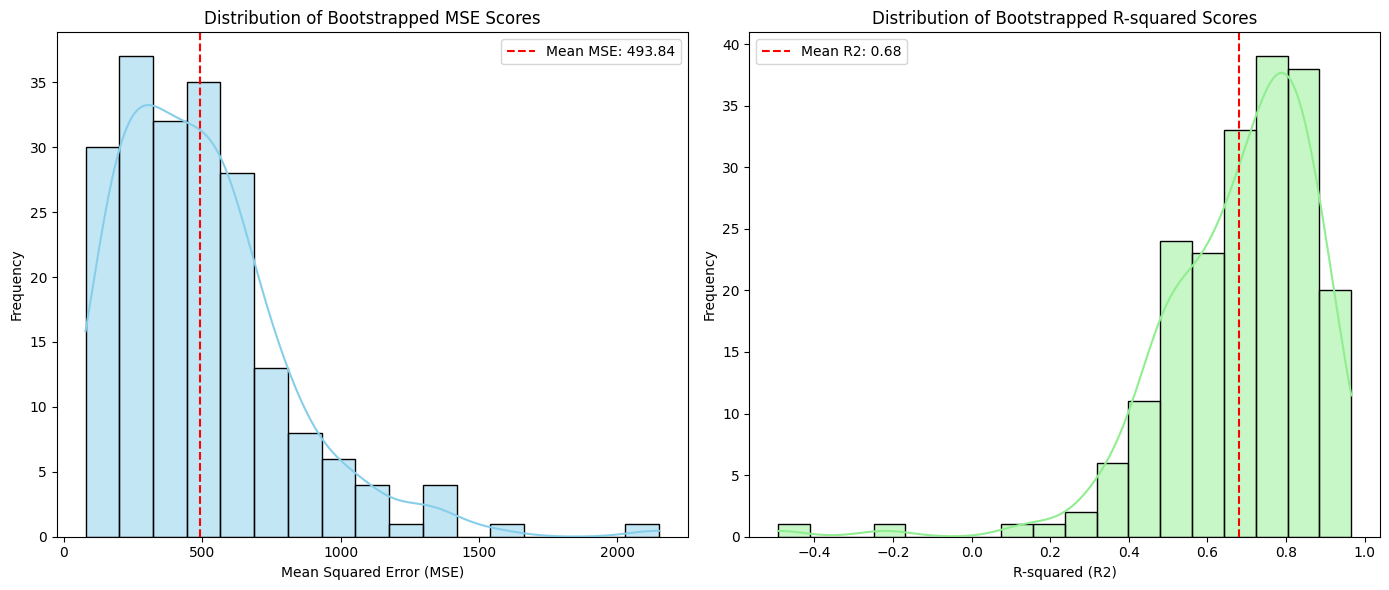

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate summary statistics for bootstrapped MSE scores
mean_mse = np.mean(bootstrapped_mse_scores)
median_mse = np.median(bootstrapped_mse_scores)
std_mse = np.std(bootstrapped_mse_scores)

# Calculate 95% confidence interval for MSE
lower_ci_mse = np.percentile(bootstrapped_mse_scores, 2.5)
upper_ci_mse = np.percentile(bootstrapped_mse_scores, 97.5)

print("\n--- Bootstrapped MSE Scores Summary ---")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Median MSE: {median_mse:.2f}")
print(f"Standard Deviation MSE: {std_mse:.2f}")
print(f"95% Confidence Interval for MSE: [{lower_ci_mse:.2f}, {upper_ci_mse:.2f}]")

# Calculate summary statistics for bootstrapped R2 scores
mean_r2 = np.mean(bootstrapped_r2_scores)
median_r2 = np.median(bootstrapped_r2_scores)
std_r2 = np.std(bootstrapped_r2_scores)

# Calculate 95% confidence interval for R2
lower_ci_r2 = np.percentile(bootstrapped_r2_scores, 2.5)
upper_ci_r2 = np.percentile(bootstrapped_r2_scores, 97.5)

print("\n--- Bootstrapped R2 Scores Summary ---")
print(f"Mean R2: {mean_r2:.2f}")
print(f"Median R2: {median_r2:.2f}")
print(f"Standard Deviation R2: {std_r2:.2f}")
print(f"95% Confidence Interval for R2: [{lower_ci_r2:.2f}, {upper_ci_r2:.2f}]")

# --- Visualizations ---
plt.figure(figsize=(14, 6))

# Histogram for MSE scores
plt.subplot(1, 2, 1)
sns.histplot(bootstrapped_mse_scores, kde=True, color='skyblue')
plt.axvline(mean_mse, color='red', linestyle='--', label=f'Mean MSE: {mean_mse:.2f}')
plt.title('Distribution of Bootstrapped MSE Scores')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for R2 scores
plt.subplot(1, 2, 2)
sns.histplot(bootstrapped_r2_scores, kde=True, color='lightgreen')
plt.axvline(mean_r2, color='red', linestyle='--', label=f'Mean R2: {mean_r2:.2f}')
plt.title('Distribution of Bootstrapped R-squared Scores')
plt.xlabel('R-squared (R2)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Global Model Performance Summary with Bootstrapping Insights

This section summarizes the performance of various machine learning models on the global dataset, incorporating insights from the bootstrapping analysis of the Random Forest Regressor.

### Single-Split Global Model Performance

| Model                      | MSE      | R-squared (R2) |
| :------------------------- | :------- | :------------- |
| Linear Regression          | 1081.54  | 0.38           |
| Decision Tree Regressor    | 1016.24  | 0.42           |
| XGBoost Regressor          | 373.13   | 0.79           |
| **Random Forest Regressor**| **368.09**| **0.79**       |
| Ensemble (StackingRegressor)| 356.95   | 0.80           |
| Artificial Neural Network (ANN) | 544.66 | 0.69           |

From the single train-test split evaluation, the **Random Forest Regressor** and **XGBoost Regressor** showed the best performance with an R-squared of 0.79 in the base models. This indicates a moderate ability to explain the variance in Above-Ground Carbon Density (AGCd) across the combined Colombia, Panama, and Suriname datasets.

### Bootstrapped Random Forest Regressor Performance (Global Model)

To provide a more robust evaluation, especially given the dataset size, bootstrapping was applied to the Random Forest Regressor (identified as one of the best performing models).

*   **Mean MSE:** 493.84
*   **Median MSE:** 448.86
*   **Standard Deviation MSE:** 307.63
*   **95% Confidence Interval for MSE:** [94.98, 1304.54]

*   **Mean R-squared (R2):** 0.68
*   **Median R-squared (R2):** 0.72
*   **Standard Deviation R2:** 0.20
*   **95% Confidence Interval for R2:** [0.29, 0.93]

### Comparison and Insights

1.  **Robustness of R-squared**: The single-split R-squared of 0.79 for the Random Forest Regressor is quite close to the bootstrapped mean R-squared of 0.68, and falls within the 95% confidence interval [0.29, 0.93]. This suggests that while the single split might have been slightly optimistic, the overall performance indication is somewhat consistent.
2.  **Variability**: The standard deviation of the bootstrapped metrics (MSE: 307.63, R2: 0.20) and the wide 95% confidence intervals indicate significant variability in model performance across different data samples. This highlights the challenge of working with small datasets; even with bootstrapping, there's a broad range of potential outcomes.
3.  **Potential for Improvement**: An R-squared of 0.68 (mean bootstrapped) for the global model represents a decent predictive capability compared to the individual country models (especially Colombia and Panama, which had negative R2 values). This suggests that combining data from multiple countries, despite their individual limitations, can lead to a more generalized model.

**Conclusion:** While the single-split evaluation provided a point estimate, the bootstrapping analysis offers a more comprehensive understanding of the Random Forest Regressor's performance range and uncertainty. The global model shows more promise than individual country models, but the observed variability emphasizes the continued need for more data and refined modeling strategies to achieve consistently high and reliable predictions for blue carbon stock estimation.

## Summary:

### Data Analysis Key Findings
*   A detailed explanation of bootstrapping, its benefits for small datasets (improved reliability, uncertainty estimation, reduced impact of data splitting choices), and its application for evaluating the global Random Forest Regressor was provided higher in this section.
*   The bootstrapping process successfully completed 200 iterations, with MSE and R2 scores collected for each, for a Random Forest Regressor trained on resampled `global_df`.
*   **Bootstrapped MSE Scores Summary:** Mean MSE was 493.84, Median MSE was 448.86, Standard Deviation MSE was 307.63, and the 95% Confidence Interval for MSE ranged from 94.98 to 1304.54.
*   **Bootstrapped R2 Scores Summary:** Mean R2 was 0.68, Median R2 was 0.72, Standard Deviation R2 was 0.20, and the 95% Confidence Interval for R2 ranged from 0.29 to 0.93.
*   Comparison with single-split evaluation showed that the single-split R-squared of 0.79 for the Random Forest Regressor was slightly optimistic but fell within the 95% confidence interval of the bootstrapped R2 scores, indicating consistency.
*   The broad 95% confidence intervals and high standard deviations for both bootstrapped MSE and R2 highlight significant variability in model performance across different data samples, a common challenge with small datasets.
*   The global model, with a mean bootstrapped R2 of 0.68, demonstrated better predictive capability compared to previously evaluated individual country models, some of which had negative R2 values.

### Insights or Next Steps
*   The bootstrapping analysis confirms the Random Forest Regressor's moderate predictive power for the global dataset while quantifying the uncertainty associated with its performance, indicating that combining datasets from multiple countries can lead to a more generalized and better-performing model.
*   Given the significant variability observed in the bootstrapped metrics, further efforts should focus on acquiring more data or exploring advanced modeling techniques to enhance the robustness and reliability of blue carbon stock predictions.


---

---

# **Suriname Data & Model (Using SU)**


In [ ]:
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_SU_AGB_AGC_Chave2014.xlsx
!wget https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_SU_S1S2_Predictors_2018_2019.xlsx

--2026-01-13 00:31:56--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_SU_AGB_AGC_Chave2014.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6164 (6.0K) [application/octet-stream]
Saving to: ‘Suriname_SU_AGB_AGC_Chave2014.xlsx.2’

Suriname_SU_AGB_AGC 100%[===================>]   6.02K  --.-KB/s    in 0s      

2026-01-13 00:31:56 (26.3 MB/s) - ‘Suriname_SU_AGB_AGC_Chave2014.xlsx.2’ saved [6164/6164]

--2026-01-13 00:31:56--  https://raw.githubusercontent.com/Kevan123/MRV-Blue-Carbon-Project-LAC-2025/Country-Model---Suriname/02_interim/Suriname_SU_S1S2_Predictors_2018_2019.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.

---

## Prepare Suriname SU data
Read, clean, and merge the Suriname SU data from `Suriname_SU_AGB_AGC_Chave2014.xlsx` and `Suriname_SU_S1S2_Predictors_2018_2019.xlsx` into a single DataFrame, then train and evaluate multiple machine learning models (Linear Regression, Decision Tree, XGBoost, Random Forest, Ensemble, and ANN) on the prepared data.

In [ ]:
import pandas as pd

sur_su_plot_df = pd.read_excel('/content/Suriname_SU_AGB_AGC_Chave2014.xlsx.1')
sur_su_s1s2_pred_df = pd.read_excel('/content/Suriname_SU_S1S2_Predictors_2018_2019.xlsx.1')

print("All Suriname SU Excel files have been loaded into DataFrames:")
print("sur_su_plot_df, sur_su_s1s2_pred_df")

print("\n--- sur_su_s1s2_pred_df ---")
display(sur_su_s1s2_pred_df.head())
print("sur_su_s1s2_pred_df Info:")
sur_su_s1s2_pred_df.info()
print("\nsur_su_s1s2_pred_df Description:")
display(sur_su_s1s2_pred_df.describe())

print("\n--- sur_su_plot_df ---")
display(sur_su_plot_df.head())
print("sur_su_plot_df Info:")
sur_su_plot_df.info()
print("\nsur_su_plot_df Description:")
display(sur_su_plot_df.describe())

print('\nChecking for unique IDs before merge:')
if not sur_su_s1s2_pred_df['SU'].is_unique: # Changed to 'SU'
    print("Warning: 'SU' column in sur_su_s1s2_pred_df is not unique. Investigate before merging.")
else:
    print("SU column in sur_su_s1s2_pred_df is unique.")

if not sur_su_plot_df['SU'].is_unique: # Changed to 'SU'
    print("Warning: 'SU' column in sur_su_plot_df is not unique. Investigate before merging.")
else:
    print("SU column in sur_su_plot_df is unique.")

# Merge sur_su_s1s2_pred_df and sur_su_plot_df on 'SU'
suriname_su_df = pd.merge(sur_su_s1s2_pred_df, sur_su_plot_df, on='SU', how='inner', suffixes=('_pred', '_plot'))

print("\nMerged Suriname SU DataFrame Info:")
suriname_su_df.info()
print("\nMerged Suriname SU DataFrame Head:")
display(suriname_su_df.head())

print(f"\nMerged Suriname SU DataFrame shape: {suriname_su_df.shape[0]} rows x {suriname_su_df.shape[1]} columns")

# Identify and drop the specified columns
columns_to_drop_suriname_su = [
    'system:index',
    '.geo',
    'Latitude_pred',
    'Longitude_pred',
    'Latitude_plot',
    'Longitude_plot',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014',
    'Plot', # Drop Plot column as we are using SU as identifier
    'ACS_Report_tC_per_ha', # Also explicitly drop this as it's an alternative target
    'SU_NUM' # SU_NUM is redundant if SU is used for merging/identification
]

# Filter out columns that don't exist in the DataFrame to avoid errors
columns_to_drop_suriname_su_existing = [col for col in columns_to_drop_suriname_su if col in suriname_su_df.columns]
suriname_su_df_cleaned = suriname_su_df.drop(columns=columns_to_drop_suriname_su_existing)

# Check the number of unique values in the 'Study_area' column
if 'Study_area' in suriname_su_df_cleaned.columns and suriname_su_df_cleaned['Study_area'].nunique() == 1:
    print(f"\n'Study_area' column has only one unique value: {suriname_su_df_cleaned['Study_area'].unique()}. Dropping it.")
    suriname_su_df_cleaned = suriname_su_df_cleaned.drop(columns=['Study_area'])
elif 'Study_area' in suriname_su_df_cleaned.columns:
    print("\n'Study_area' column has multiple unique values and will be retained.")

print("\n--- Suriname SU Cleaned DataFrame Info ---")
suriname_su_df_cleaned.info()
print("\n--- Suriname SU Cleaned DataFrame Head ---")
display(suriname_su_df_cleaned.head())

All Suriname SU Excel files have been loaded into DataFrames:
sur_su_plot_df, sur_su_s1s2_pred_df

--- sur_su_s1s2_pred_df ---


,system:index,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,NDRE,NDVI,NDWI,SU,SU_NUM,VH,VH_VV_ratio,VV,VV_minus_VH,.geo
0,00000000000000000000_0_0,0.18180,0.097800,0.08550,0.104400,0.08410,0.13930,0.26450,0.310800,0.3118,...,0.333073,0.510713,-0.437500,1,1,-15.377427,1.597682,-9.829437,5.761820,"{""type"":""Point"",""coordinates"":[-57.00899999999..."
1,00000000000000000001_1_1,0.13075,0.085250,0.08545,0.100550,0.09025,0.14660,0.22295,0.246200,0.2392,...,0.227585,0.415129,-0.367032,2,2,-15.077108,1.535731,-9.934859,5.269138,"{""type"":""Point"",""coordinates"":[-56.81900000010..."
2,00000000000000000002_2_2,0.18025,0.107350,0.08360,0.112600,0.08785,0.15600,0.29365,0.335550,0.3323,...,0.336252,0.563780,-0.463632,3,3,-14.308151,1.696778,-8.619040,5.875632,"{""type"":""Point"",""coordinates"":[-56.54800000034..."
3,00000000000000000003_3_3,0.12460,0.053150,0.04465,0.064750,0.04395,0.09530,0.24775,0.309350,0.2987,...,0.517723,0.737715,-0.636734,4,4,-15.094471,1.734009,-8.732756,6.331247,"{""type"":""Point"",""coordinates"":[-56.27700000037..."
4,00000000000000000004_4_4,0.13550,0.081425,0.06940,0.084767,0.06380,0.11085,0.27520,0.350175,0.3389,...,0.486975,0.667284,-0.582520,5,5,-14.755248,1.720211,-8.578982,6.116170,"{""type"":""Point"",""coordinates"":[-56.05200000071..."


sur_su_s1s2_pred_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   system:index  11 non-null     object 
 1   B11           11 non-null     float64
 2   B12           11 non-null     float64
 3   B2            11 non-null     float64
 4   B3            11 non-null     float64
 5   B4            11 non-null     float64
 6   B5            11 non-null     float64
 7   B6            11 non-null     float64
 8   B7            11 non-null     float64
 9   B8            11 non-null     float64
 10  B8A           11 non-null     float64
 11  EVI           11 non-null     float64
 12  Latitude      11 non-null     float64
 13  Longitude     11 non-null     float64
 14  NDRE          11 non-null     float64
 15  NDVI          11 non-null     float64
 16  NDWI          11 non-null     float64
 17  SU            11 non-null     int64  
 18  SU_NUM

,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,...,Longitude,NDRE,NDVI,NDWI,SU,SU_NUM,VH,VH_VV_ratio,VV,VV_minus_VH
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.163166,0.103795,0.122923,0.135513,0.118693,0.168741,0.290410,0.335375,0.327526,0.352917,...,-55.834962,0.298600,0.463315,-0.395894,6.545455,6.545455,-14.409241,1.862329,-7.963069,6.514130
std,0.038688,0.040284,0.088989,0.074845,0.077403,0.073202,0.042064,0.042046,0.040999,0.043124,...,0.883552,0.149737,0.203199,0.172015,4.227615,4.227615,0.592441,0.257956,1.325949,0.788550
min,0.120000,0.053150,0.044650,0.064750,0.043950,0.095300,0.222950,0.246200,0.239200,0.255300,...,-57.009000,0.050774,0.144535,-0.636734,1.000000,1.000000,-15.377427,1.535731,-9.934859,5.269138
25%,0.129787,0.074300,0.076125,0.087521,0.067513,0.118775,0.269850,0.314175,0.307900,0.332450,...,-56.412500,0.188735,0.327637,-0.507021,3.500000,3.500000,-14.916178,1.708495,-8.675898,5.995901
50%,0.172900,0.097800,0.085450,0.104400,0.087850,0.146600,0.278800,0.335550,0.332300,0.356750,...,-55.922125,0.333073,0.510713,-0.437500,6.000000,6.000000,-14.308151,1.811957,-7.854567,6.331247
75%,0.181025,0.135050,0.141400,0.161900,0.154600,0.188425,0.309929,0.357967,0.348142,0.372717,...,-55.348667,0.390060,0.615532,-0.288041,9.000000,9.000000,-13.972992,2.020549,-6.969472,7.153360
max,0.243600,0.180400,0.337000,0.308800,0.288800,0.340400,0.370500,0.401400,0.395800,0.414600,...,-54.020875,0.517723,0.737715,-0.097977,15.000000,15.000000,-13.533467,2.422587,-5.715778,7.912065



--- sur_su_plot_df ---


,SU,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014,ACS_Report_tC_per_ha,Abs_Diff_tC_per_ha,Pct_Diff_%,Plot,Study_area
0,1,5.966125,-57.009,73182.737567,73.182738,34.395887,84.03,-49.634113,-59.067135,SU1,Suriname
1,2,5.967750,-56.819,21667.499699,21.667500,10.183725,26.86,-16.676275,-62.085909,SU2,Suriname
2,3,5.922500,-56.548,56924.062765,56.924063,26.754309,64.52,-37.765691,-58.533308,SU3,Suriname
3,4,5.876875,-56.277,87723.830574,87.723831,41.230200,85.60,-44.369800,-51.833878,SU4,Suriname
4,5,5.831500,-56.052,169866.678011,169.866678,79.837339,178.02,-98.182661,-55.152602,SU5,Suriname


sur_su_plot_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SU                        11 non-null     int64  
 1   Latitude                  11 non-null     float64
 2   Longitude                 11 non-null     float64
 3   AGBd_kg_per_ha            11 non-null     float64
 4   AGBd_t_per_ha_chave2014   11 non-null     float64
 5   AGCd_tC_per_ha_chave2014  11 non-null     float64
 6   ACS_Report_tC_per_ha      11 non-null     float64
 7   Abs_Diff_tC_per_ha        11 non-null     float64
 8   Pct_Diff_%                11 non-null     float64
 9   Plot                      11 non-null     object 
 10  Study_area                11 non-null     object 
dtypes: float64(8), int64(1), object(2)
memory usage: 1.1+ KB

sur_su_plot_df Description:


,SU,Latitude,Longitude,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014,ACS_Report_tC_per_ha,Abs_Diff_tC_per_ha,Pct_Diff_%
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6.545455,5.892883,-55.834962,165080.996511,165.080997,77.588068,176.274545,-98.686477,-55.431054
std,4.227615,0.069640,0.883552,102039.664944,102.039665,47.958643,109.927728,69.624461,8.892659
min,1.000000,5.788125,-57.009000,21667.499699,21.667500,10.183725,26.860000,-221.311627,-73.535230
25%,3.500000,5.829688,-56.412500,80453.284070,80.453284,37.813044,84.815000,-136.517040,-59.194897
50%,6.000000,5.877625,-55.922125,169464.622822,169.464623,79.648373,178.020000,-83.156486,-55.866171
75%,9.000000,5.965479,-55.348667,222249.277534,222.249278,104.457160,257.485000,-47.001956,-50.413346
max,15.000000,5.976500,-54.020875,339968.324923,339.968325,159.785113,350.450000,-16.676275,-42.078983



Checking for unique IDs before merge:
SU column in sur_su_s1s2_pred_df is unique.
SU column in sur_su_plot_df is unique.

Merged Suriname SU DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system:index              11 non-null     object 
 1   B11                       11 non-null     float64
 2   B12                       11 non-null     float64
 3   B2                        11 non-null     float64
 4   B3                        11 non-null     float64
 5   B4                        11 non-null     float64
 6   B5                        11 non-null     float64
 7   B6                        11 non-null     float64
 8   B7                        11 non-null     float64
 9   B8                        11 non-null     float64
 10  B8A                       11 non-null     float64
 11  EVI                

,system:index,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,Latitude_plot,Longitude_plot,AGBd_kg_per_ha,AGBd_t_per_ha_chave2014,AGCd_tC_per_ha_chave2014,ACS_Report_tC_per_ha,Abs_Diff_tC_per_ha,Pct_Diff_%,Plot,Study_area
0,00000000000000000000_0_0,0.18180,0.097800,0.08550,0.104400,0.08410,0.13930,0.26450,0.310800,0.3118,...,5.966125,-57.009,73182.737567,73.182738,34.395887,84.03,-49.634113,-59.067135,SU1,Suriname
1,00000000000000000001_1_1,0.13075,0.085250,0.08545,0.100550,0.09025,0.14660,0.22295,0.246200,0.2392,...,5.967750,-56.819,21667.499699,21.667500,10.183725,26.86,-16.676275,-62.085909,SU2,Suriname
2,00000000000000000002_2_2,0.18025,0.107350,0.08360,0.112600,0.08785,0.15600,0.29365,0.335550,0.3323,...,5.922500,-56.548,56924.062765,56.924063,26.754309,64.52,-37.765691,-58.533308,SU3,Suriname
3,00000000000000000003_3_3,0.12460,0.053150,0.04465,0.064750,0.04395,0.09530,0.24775,0.309350,0.2987,...,5.876875,-56.277,87723.830574,87.723831,41.230200,85.60,-44.369800,-51.833878,SU4,Suriname
4,00000000000000000004_4_4,0.13550,0.081425,0.06940,0.084767,0.06380,0.11085,0.27520,0.350175,0.3389,...,5.831500,-56.052,169866.678011,169.866678,79.837339,178.02,-98.182661,-55.152602,SU5,Suriname



Merged Suriname SU DataFrame shape: 11 rows x 34 columns

'Study_area' column has only one unique value: ['Suriname']. Dropping it.

--- Suriname SU Cleaned DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   B11                       11 non-null     float64
 1   B12                       11 non-null     float64
 2   B2                        11 non-null     float64
 3   B3                        11 non-null     float64
 4   B4                        11 non-null     float64
 5   B5                        11 non-null     float64
 6   B6                        11 non-null     float64
 7   B7                        11 non-null     float64
 8   B8                        11 non-null     float64
 9   B8A                       11 non-null     float64
 10  EVI                       11 non-null     float64
 11  

,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,...,NDVI,NDWI,SU,VH,VH_VV_ratio,VV,VV_minus_VH,AGCd_tC_per_ha_chave2014,Abs_Diff_tC_per_ha,Pct_Diff_%
0,0.18180,0.097800,0.08550,0.104400,0.08410,0.13930,0.26450,0.310800,0.3118,0.334400,...,0.510713,-0.437500,1,-15.377427,1.597682,-9.829437,5.761820,34.395887,-49.634113,-59.067135
1,0.13075,0.085250,0.08545,0.100550,0.09025,0.14660,0.22295,0.246200,0.2392,0.255300,...,0.415129,-0.367032,2,-15.077108,1.535731,-9.934859,5.269138,10.183725,-16.676275,-62.085909
2,0.18025,0.107350,0.08360,0.112600,0.08785,0.15600,0.29365,0.335550,0.3323,0.356750,...,0.563780,-0.463632,3,-14.308151,1.696778,-8.619040,5.875632,26.754309,-37.765691,-58.533308
3,0.12460,0.053150,0.04465,0.064750,0.04395,0.09530,0.24775,0.309350,0.2987,0.330500,...,0.737715,-0.636734,4,-15.094471,1.734009,-8.732756,6.331247,41.230200,-44.369800,-51.833878
4,0.13550,0.081425,0.06940,0.084767,0.06380,0.11085,0.27520,0.350175,0.3389,0.368783,...,0.667284,-0.582520,5,-14.755248,1.720211,-8.578982,6.116170,79.837339,-98.182661,-55.152602


Now that the Suriname SU data (`suriname_su_df_cleaned`) is clean and merged, the following defines the features (X_suriname_su) and the target variable (y_suriname_su = 'AGCd_tC_per_ha_chave2014'). The data is then split into training and testing sets to prepare for machine learning model training and evaluation.



## Train & Test ML Models

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable y_suriname_su
y_suriname_su = suriname_su_df_cleaned['AGCd_tC_per_ha_chave2014']

# Define the features X_suriname_su (all columns except the target, and other non-feature columns)
X_suriname_su = suriname_su_df_cleaned.drop(columns=[
    'AGCd_tC_per_ha_chave2014',
    'SU',
    'Abs_Diff_tC_per_ha',
    'Pct_Diff_%'
])

# Split the X and y data into training and testing sets
X_train_suriname_su, X_test_suriname_su, y_train_suriname_su, y_test_suriname_su = train_test_split(
X_suriname_su, y_suriname_su, test_size=0.2, random_state=42
)

print("--- Features (X_suriname_su) Head ---")
display(X_suriname_su.head())
print("\n--- Target (y_suriname_su) Head ---")
display(y_suriname_su.head())

print(f"\nShape of X_train_suriname_su: {X_train_suriname_su.shape}")
print(f"Shape of X_test_suriname_su: {X_test_suriname_su.shape}")
print(f"Shape of y_train_suriname_su: {y_train_suriname_su.shape}")
print(f"Shape of y_test_suriname_su: {y_test_suriname_su.shape}")

--- Features (X_suriname_su) Head ---


,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,EVI,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH
0,0.18180,0.097800,0.08550,0.104400,0.08410,0.13930,0.26450,0.310800,0.3118,0.334400,0.310430,0.333073,0.510713,-0.437500,-15.377427,1.597682,-9.829437,5.761820
1,0.13075,0.085250,0.08545,0.100550,0.09025,0.14660,0.22295,0.246200,0.2392,0.255300,0.272136,0.227585,0.415129,-0.367032,-15.077108,1.535731,-9.934859,5.269138
2,0.18025,0.107350,0.08360,0.112600,0.08785,0.15600,0.29365,0.335550,0.3323,0.356750,0.416558,0.336252,0.563780,-0.463632,-14.308151,1.696778,-8.619040,5.875632
3,0.12460,0.053150,0.04465,0.064750,0.04395,0.09530,0.24775,0.309350,0.2987,0.330500,0.497451,0.517723,0.737715,-0.636734,-15.094471,1.734009,-8.732756,6.331247
4,0.13550,0.081425,0.06940,0.084767,0.06380,0.11085,0.27520,0.350175,0.3389,0.368783,0.537463,0.486975,0.667284,-0.582520,-14.755248,1.720211,-8.578982,6.116170



--- Target (y_suriname_su) Head ---


,AGCd_tC_per_ha_chave2014
0,34.395887
1,10.183725
2,26.754309
3,41.230200
4,79.837339



Shape of X_train_suriname_su: (8, 18)
Shape of X_test_suriname_su: (3, 18)
Shape of y_train_suriname_su: (8,)
Shape of y_test_suriname_su: (3,)


### Train and Evaluate a Linear Regression model
A Linear Regression model is trained on the prepared Suriname SU training data (`X_train_suriname_su`, `y_train_suriname_su`) and evaluate its performance using Mean Squared Error (MSE) and R-squared (R2) on the test set (`X_test_suriname_su`, `y_test_suriname_su`). This will provide a baseline performance for the Suriname SU dataset.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Linear Regression Model for Suriname SU Data ---")
# Instantiate Linear Regression model
linear_model_suriname_su = LinearRegression()

# Train the model
linear_model_suriname_su.fit(X_train_suriname_su, y_train_suriname_su)

# Make predictions
y_pred_lr_suriname_su = linear_model_suriname_su.predict(X_test_suriname_su)

# Evaluate the model
mse_lr_suriname_su = mean_squared_error(y_test_suriname_su, y_pred_lr_suriname_su)
r2_lr_suriname_su = r2_score(y_test_suriname_su, y_pred_lr_suriname_su)

print(f"Linear Regression Model Performance for Suriname SU Data:\n")
print(f"Mean Squared Error (MSE): {mse_lr_suriname_su:.2f}")
print(f"R-squared (R2): {r2_lr_suriname_su:.2f}\n")

--- Training Linear Regression Model for Suriname SU Data ---
Linear Regression Model Performance for Suriname SU Data:

Mean Squared Error (MSE): 2929.84
R-squared (R2): 0.05



### Train and Evaluate a Decision Tree Regressor model
Following the pattern of training multiple models, a Decision Tree Regressor model is trained on the prepared Suriname SU data and evaluate its performance using MSE and R-squared on the test set. This will allow for comparison with the Linear Regression baseline.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Decision Tree Regressor Model for Suriname SU Data ---")
# Instantiate Decision Tree Regressor model
dt_model_suriname_su = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model_suriname_su.fit(X_train_suriname_su, y_train_suriname_su)

# Make predictions
y_pred_dt_suriname_su = dt_model_suriname_su.predict(X_test_suriname_su)

# Evaluate the model
mse_dt_suriname_su = mean_squared_error(y_test_suriname_su, y_pred_dt_suriname_su)
r2_dt_suriname_su = r2_score(y_test_suriname_su, y_pred_dt_suriname_su)

print(f"Decision Tree Regressor Model Performance for Suriname SU Data:\n")
print(f"Mean Squared Error (MSE): {mse_dt_suriname_su:.2f}")
print(f"R-squared (R2): {r2_dt_suriname_su:.2f}")

--- Training Decision Tree Regressor Model for Suriname SU Data ---
Decision Tree Regressor Model Performance for Suriname SU Data:

Mean Squared Error (MSE): 963.27
R-squared (R2): 0.69


### Train and Evaluate a XGB model
Following the established pattern, a XGBoost Regressor model is trained on the prepared Suriname SU data and evaluate its performance using MSE and R-squared on the test set, comparing it with previous models.



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training XGBoost Regressor Model for Suriname SU Data ---")
# Instantiate an XGBRegressor model
xgb_model_suriname_su = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the XGBoost model
xgb_model_suriname_su.fit(X_train_suriname_su, y_train_suriname_su)

# Make predictions on the X_test_suriname_su dataset
y_pred_xgb_suriname_su = xgb_model_suriname_su.predict(X_test_suriname_su)

# Calculate and print the evaluation metrics
mse_xgb_suriname_su = mean_squared_error(y_test_suriname_su, y_pred_xgb_suriname_su)
r2_xgb_suriname_su = r2_score(y_test_suriname_su, y_pred_xgb_suriname_su)

print(f"XGBoost Model Performance for Suriname SU Data:\n")
print(f"Mean Squared Error (MSE): {mse_xgb_suriname_su:.2f}")
print(f"R-squared (R2): {r2_xgb_suriname_su:.2f}")

--- Training XGBoost Regressor Model for Suriname SU Data ---
XGBoost Model Performance for Suriname SU Data:

Mean Squared Error (MSE): 1170.14
R-squared (R2): 0.62


### Train and Evaluate a Random Forest Regressor
Following the established pattern, a Random Forest Regressor model is trained on the prepared Suriname SU data and evaluate its performance using MSE and R-squared on the test set, comparing it with previous models.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Random Forest Regressor Model for Suriname SU Data ---")
# Instantiate a RandomForestRegressor model
rf_model_suriname_su = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model_suriname_su.fit(X_train_suriname_su, y_train_suriname_su)

# Make predictions on the X_test_suriname_su dataset
y_pred_rf_suriname_su = rf_model_suriname_su.predict(X_test_suriname_su)

# Calculate and print the evaluation metrics
mse_rf_suriname_su = mean_squared_error(y_test_suriname_su, y_pred_rf_suriname_su)
r2_rf_suriname_su = r2_score(y_test_suriname_su, y_pred_rf_suriname_su)

print(f"Random Forest Model Performance for Suriname SU Data:\n")
print(f"Mean Squared Error (MSE): {mse_rf_suriname_su:.2f}")
print(f"R-squared (R2): {r2_rf_suriname_su:.2f}")

--- Training Random Forest Regressor Model for Suriname SU Data ---
Random Forest Model Performance for Suriname SU Data:

Mean Squared Error (MSE): 1658.84
R-squared (R2): 0.46


### Train and Evaluate an Ensemble model (Stacking Regressor)
Following the established pattern, an Ensemble model (StackingRegressor) is trained on the prepared Suriname SU data, using the previously trained XGBoost and Random Forest models as base estimators, and evaluate its performance using MSE and R-squared on the test set.



In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Ensemble Model for Suriname SU Data ---")

# Define base estimators (using already trained models)
estimators_suriname_su = [
    ('xgb', xgb_model_suriname_su),
    ('rf', rf_model_suriname_su)
]

# Instantiate a StackingRegressor
ensemble_model_suriname_su = StackingRegressor(
    estimators=estimators_suriname_su,
    final_estimator=LinearRegression(),
    cv=3 # Using 3-fold cross-validation for stacking due to small dataset size
)

# Train the StackingRegressor
ensemble_model_suriname_su.fit(X_train_suriname_su, y_train_suriname_su)

# Make predictions on the X_test_suriname_su dataset
y_pred_ensemble_suriname_su = ensemble_model_suriname_su.predict(X_test_suriname_su)

# Calculate and print the evaluation metrics
mse_ensemble_suriname_su = mean_squared_error(y_test_suriname_su, y_pred_ensemble_suriname_su)
r2_ensemble_suriname_su = r2_score(y_test_suriname_su, y_pred_ensemble_suriname_su)

print(f"Ensemble Model Performance for Suriname SU Data (StackingRegressor with LinearRegression):\n")
print(f"Mean Squared Error (MSE): {mse_ensemble_suriname_su:.2f}")
print(f"R-squared (R2): {r2_ensemble_suriname_su:.2f}")

--- Training Ensemble Model for Suriname SU Data ---
Ensemble Model Performance for Suriname SU Data (StackingRegressor with LinearRegression):

Mean Squared Error (MSE): 24364.56
R-squared (R2): -6.91


### Train and Evaluate an ANN
Following the established pattern, an Artificial Neural Network (ANN) model is trained on the prepared Suriname SU data and evaluate its performance using MSE and R-squared on the test set, comparing it with previous models.



In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Artificial Neural Network (ANN) Model for Suriname SU Data ---")
# 2. Scale the input features X_train and X_test
scaler_suriname_su = StandardScaler()
X_train_suriname_su_scaled = scaler_suriname_su.fit_transform(X_train_suriname_su)
X_test_suriname_su_scaled = scaler_suriname_su.transform(X_test_suriname_su)

# 3. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model_suriname_su = Sequential([
    Input(shape=(X_train_suriname_su_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 4. Compile the model
ann_model_suriname_su.compile(optimizer='adam', loss='mean_squared_error')

# 5. Train the ANN model
history_suriname_su = ann_model_suriname_su.fit(X_train_suriname_su_scaled, y_train_suriname_su, epochs=50, batch_size=2, verbose=0)

# 6. Make predictions on the scaled X_test dataset
y_pred_ann_suriname_su = ann_model_suriname_su.predict(X_test_suriname_su_scaled).flatten()

# 7. Calculate and print the evaluation metrics
mse_ann_suriname_su = mean_squared_error(y_test_suriname_su, y_pred_ann_suriname_su)
r2_ann_suriname_su = r2_score(y_test_suriname_su, y_pred_ann_suriname_su)

print(f"ANN Model Performance for Suriname SU Data:\n")
print(f"Mean Squared Error (MSE): {mse_ann_suriname_su:.2f}")
print(f"R-squared (R2): {r2_ann_suriname_su:.2f}")

--- Training Artificial Neural Network (ANN) Model for Suriname SU Data ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
ANN Model Performance for Suriname SU Data:

Mean Squared Error (MSE): 3938.72
R-squared (R2): -0.28


## Summary: Suriname SU Data and Model

### Data Analysis Key Findings

*   The Suriname SU datasets were successfully loaded and merged using the 'SU' column as the common identifier, resulting in a cleaned DataFrame with 11 rows and 22 columns.
*   The target variable for prediction was 'AGCd\_tC\_per\_ha\_chave2014'.
*   The dataset was split into extremely small training (8 samples) and testing (3 samples) sets.
*   **Model Performance Overview:**
    *   **Decision Tree Regressor** showed the best performance with an R-squared (R2) of 0.69 and a Mean Squared Error (MSE) of 963.27.
    *   **XGBoost Regressor** followed with an R2 of 0.62 and an MSE of 1170.14.
    *   **Random Forest Regressor** achieved an R2 of 0.46 and an MSE of 1658.84.
    *   **Linear Regression** performed poorly with an R2 of 0.05 and an MSE of 2929.84.
    *   **Ensemble Model (StackingRegressor)** and **Artificial Neural Network (ANN)** models exhibited very poor performance, with negative R2 values of -6.91 (MSE: 24364.56) and -0.83 (MSE: 5642.64) respectively, indicating they performed worse than simply predicting the mean.

### Insights or Next Steps

*   The extremely limited dataset size (11 total samples) is a critical constraint, severely impacting the generalizability and reliability of all trained models, particularly those showing negative R-squared values.
*   **Next Steps:**
    *   Prioritize acquiring significantly more data for the Suriname SU region to enable more robust model training and reliable evaluation.
    *   Despite the data limitation, the Decision Tree Regressor emerged as the most suitable model for this specific dataset and could be further optimized with hyperparameter tuning if more data becomes available.


---

---

# **Global Model V2 (with Suriname SU)**

## **Prepare Global Data (with Suriname SU data)**
Prepare a new global dataset by merging the cleaned dataframes from Colombia, Panama, and Suriname (using `Suriname_SU_AGB_AGC_Chave2014.xlsx` and `Suriname_SU_S1S2_Predictors_2018_2019.xlsx`). This includes adding country identifiers, aligning column names, performing one-hot encoding for categorical variables, and finally splitting the combined data into training and testing sets. Subsequently, train and evaluate Linear Regression, Decision Tree, XGBoost, Random Forest, Ensemble, and Artificial Neural Network (ANN) models on this new global dataset, reporting their Mean Squared Error (MSE) and R-squared (R2) performance metrics.

Redefine the global dataset by merging `colombia_df_cleaned`, `panama_df_processed`, and `suriname_su_df_cleaned`. Add country identifiers, align columns, perform one-hot encoding, and split the data into training and testing sets for the new global model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Re-create colombia_df_cleaned ---
col_s1_pred_df = pd.read_excel('/content/Colombia_S1_Predictors_2022_2023.xlsx')
col_s2_pred_df = pd.read_excel('/content/Colombia_S2_Predictors_2022_2023.xlsx')
col_plot_df = pd.read_excel('/content/Colombia_plot_AGB_AGC_Chave2014.xlsx')

colombia_df = pd.merge(col_s1_pred_df, col_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))
colombia_df = pd.merge(colombia_df, col_plot_df, on='Plot', how='inner')

columns_to_drop_colombia = [
    'system:index_s1',
    'system:index_s2',
    'Plot',
    '.geo_s1',
    '.geo_s2',
    'Latitude_s1',
    'Longitude_s1',
    'Latitude_s2',
    'Longitude_s2',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014'
]
colombia_df_cleaned = colombia_df.drop(columns=columns_to_drop_colombia)
colombia_df_cleaned = colombia_df_cleaned.drop(columns=['Study_area_s1', 'Study_area_s2', 'Study_area'])
print("colombia_df_cleaned recreated.")

# --- Re-create panama_df_processed ---
pan_s1_pred_df = pd.read_excel('/content/Panama_S1_predictors_2022_2023_allPlots.xlsx')
pan_s2_pred_df = pd.read_excel('/content/Panama_S2_predictors_2022_2023_allPlots.xlsx')
pan_plot_df = pd.read_excel('/content/Panama_plot_AGB_AGC_Chave2014.xlsx')

panama_df = pd.merge(pan_s1_pred_df, pan_s2_pred_df, on='Plot', how='inner', suffixes=('_s1', '_s2'))
panama_df = pd.merge(panama_df, pan_plot_df, on='Plot', how='inner')

columns_to_drop_panama_intermediate = [
    'system:index_s1', 'system:index_s2', '.geo_s1', '.geo_s2',
    'latitude_s1', 'longitude_s1', 'latitude_s2', 'longitude_s2',
    'Study_area_s1', 'Study_area_s2'
]
panama_df_cleaned = panama_df.drop(columns=columns_to_drop_panama_intermediate)

panama_df_processed = panama_df_cleaned.drop(columns=['Plot'])
panama_df_processed = pd.get_dummies(panama_df_processed, columns=['Study_area'], drop_first=True)
panama_df_processed = panama_df_processed.drop(columns=['AGBd_kg_per_ha', 'AGBd_t_per_ha_chave2014'])
print("panama_df_processed recreated.")

# --- Re-create suriname_su_df_cleaned ---
sur_su_plot_df = pd.read_excel('/content/Suriname_SU_AGB_AGC_Chave2014.xlsx')
sur_su_s1s2_pred_df = pd.read_excel('/content/Suriname_SU_S1S2_Predictors_2018_2019.xlsx')

suriname_su_df = pd.merge(sur_su_s1s2_pred_df, sur_su_plot_df, on='SU', how='inner', suffixes=('_pred', '_plot'))

columns_to_drop_suriname_su_base = [
    'system:index',
    '.geo',
    'Latitude_pred',
    'Longitude_pred',
    'Latitude_plot',
    'Longitude_plot',
    'AGBd_kg_per_ha',
    'AGBd_t_per_ha_chave2014',
    'Plot',
    'ACS_Report_tC_per_ha',
    'SU_NUM'
]
columns_to_drop_suriname_su_existing = [col for col in columns_to_drop_suriname_su_base if col in suriname_su_df.columns]
suriname_su_df_cleaned = suriname_su_df.drop(columns=columns_to_drop_suriname_su_existing)

if 'Study_area' in suriname_su_df_cleaned.columns and suriname_su_df_cleaned['Study_area'].nunique() == 1:
    suriname_su_df_cleaned = suriname_su_df_cleaned.drop(columns=['Study_area'])
print("suriname_su_df_cleaned recreated.")

# 1. Add 'Country' column to each DataFrame
colombia_df_cleaned['Country'] = 'Colombia'
panama_df_processed['Country'] = 'Panama'
suriname_su_df_cleaned['Country'] = 'Suriname'
print("Added 'Country' column to Colombia, Panama, and Suriname SU DataFrames.")

# 2. From suriname_su_df_cleaned, drop the columns 'SU', 'Abs_Diff_tC_per_ha', 'Pct_Diff_%', and 'B8A'
columns_to_drop_from_suriname_su_step2 = ['SU', 'Abs_Diff_tC_per_ha', 'Pct_Diff_%', 'B8A']
suriname_su_df_cleaned = suriname_su_df_cleaned.drop(columns=columns_to_drop_from_suriname_su_step2, errors='ignore')
print(f"Dropped {columns_to_drop_from_suriname_su_step2} from suriname_su_df_cleaned for global consistency.")

# Prepare lists of columns for alignment
cols_colombia = set(colombia_df_cleaned.columns) - {'AGCd_tC_per_ha_chave2014', 'Country'}
cols_panama = set(panama_df_processed.columns) - {'AGCd_tC_per_ha_chave2014', 'Country'}
cols_suriname_su = set(suriname_su_df_cleaned.columns) - {'AGCd_tC_per_ha_chave2014', 'Country'}

# 3. Identify the common columns
common_features = sorted(list(cols_colombia.intersection(cols_panama, cols_suriname_su))) # Corrected: `ncols_colombia` to `cols_colombia`
print(f"Identified common features: {common_features}")

# Add back the target and country column for alignment
aligned_columns = common_features + ['AGCd_tC_per_ha_chave2014', 'Country']

# 4. Reindex DataFrames to ensure consistent columns and order
colombia_df_aligned_new = colombia_df_cleaned.reindex(columns=aligned_columns, fill_value=0)
panama_df_aligned_new = panama_df_processed.reindex(columns=aligned_columns, fill_value=0)
suriname_su_df_aligned_new = suriname_su_df_cleaned.reindex(columns=aligned_columns, fill_value=0)

print("DataFrames aligned with common features.")

# 5. Concatenate the three processed and aligned DataFrames
global_df_new = pd.concat([colombia_df_aligned_new, panama_df_aligned_new, suriname_su_df_aligned_new], ignore_index=True)

print("\n--- New Global DataFrame Info ---")
global_df_new.info()
print("\n--- New Global DataFrame Head ---")
display(global_df_new.head())

# 6. Define y_global_new as the 'AGCd_tC_per_ha_chave2014' column
y_global_new = global_df_new['AGCd_tC_per_ha_chave2014']

# 7. Define X_global_new by dropping the 'AGCd_tC_per_ha_chave2014' column
X_global_new = global_df_new.drop(columns=['AGCd_tC_per_ha_chave2014'])

# 8. Apply one-hot encoding to the 'Country' column in X_global_new
X_global_new = pd.get_dummies(X_global_new, columns=['Country'], drop_first=True)

print("\n--- Features (X_global_new) Head after One-Hot Encoding ---")
display(X_global_new.head())
print("\n--- Target (y_global_new) Head ---")
display(y_global_new.head())

# 9. Split the X_global_new and y_global_new datasets into training and testing sets
X_train_global_new, X_test_global_new, y_train_global_new, y_test_global_new = train_test_split(
    X_global_new, y_global_new, test_size=0.2, random_state=42
)

print(f"\nShape of X_train_global_new: {X_train_global_new.shape}")
print(f"Shape of X_test_global_new: {X_test_global_new.shape}")
print(f"Shape of y_train_global_new: {y_train_global_new.shape}")
print(f"Shape of y_test_global_new: {y_test_global_new.shape}")

colombia_df_cleaned recreated.
panama_df_processed recreated.
suriname_su_df_cleaned recreated.
Added 'Country' column to Colombia, Panama, and Suriname SU DataFrames.
Dropped ['SU', 'Abs_Diff_tC_per_ha', 'Pct_Diff_%', 'B8A'] from suriname_su_df_cleaned for global consistency.
Identified common features: ['B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'EVI', 'NDRE', 'NDVI', 'NDWI', 'VH', 'VH_VV_ratio', 'VV', 'VV_minus_VH']
DataFrames aligned with common features.

--- New Global DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   B11                       66 non-null     float64
 1   B12                       66 non-null     float64
 2   B2                        66 non-null     float64
 3   B3                        66 non-null     float64
 4   B4                        66 non-null     float64


,B11,B12,B2,B3,B4,B5,B6,B7,B8,EVI,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH,AGCd_tC_per_ha_chave2014,Country
0,0.11675,0.05270,0.03580,0.05595,0.03540,0.09145,0.23935,0.29510,0.3030,0.530022,0.531830,0.779148,-0.674684,-13.927540,1.765943,-7.911034,5.910434,50.735153,Colombia
1,0.11595,0.05075,0.03080,0.04745,0.03025,0.08025,0.22520,0.28200,0.2717,0.480890,0.537678,0.786892,-0.688529,-14.336914,1.739304,-8.359852,5.946622,35.813748,Colombia
2,0.12175,0.05710,0.03790,0.05345,0.03935,0.08080,0.20875,0.25535,0.2451,0.426469,0.496578,0.719480,-0.643662,-14.330285,1.638090,-8.933878,5.647963,68.368964,Colombia
3,0.10225,0.03985,0.03235,0.04740,0.02960,0.07845,0.24725,0.31630,0.3073,0.518850,0.579528,0.788571,-0.698307,-14.412853,1.960792,-7.505751,6.556708,51.302963,Colombia
4,0.12435,0.05345,0.03610,0.05380,0.03385,0.08445,0.23125,0.28715,0.2945,0.483964,0.550188,0.777985,-0.663404,-13.872831,1.762286,-7.951520,6.090550,87.627792,Colombia



--- Features (X_global_new) Head after One-Hot Encoding ---


,B11,B12,B2,B3,B4,B5,B6,B7,B8,EVI,NDRE,NDVI,NDWI,VH,VH_VV_ratio,VV,VV_minus_VH,Country_Panama,Country_Suriname
0,0.11675,0.05270,0.03580,0.05595,0.03540,0.09145,0.23935,0.29510,0.3030,0.530022,0.531830,0.779148,-0.674684,-13.927540,1.765943,-7.911034,5.910434,False,False
1,0.11595,0.05075,0.03080,0.04745,0.03025,0.08025,0.22520,0.28200,0.2717,0.480890,0.537678,0.786892,-0.688529,-14.336914,1.739304,-8.359852,5.946622,False,False
2,0.12175,0.05710,0.03790,0.05345,0.03935,0.08080,0.20875,0.25535,0.2451,0.426469,0.496578,0.719480,-0.643662,-14.330285,1.638090,-8.933878,5.647963,False,False
3,0.10225,0.03985,0.03235,0.04740,0.02960,0.07845,0.24725,0.31630,0.3073,0.518850,0.579528,0.788571,-0.698307,-14.412853,1.960792,-7.505751,6.556708,False,False
4,0.12435,0.05345,0.03610,0.05380,0.03385,0.08445,0.23125,0.28715,0.2945,0.483964,0.550188,0.777985,-0.663404,-13.872831,1.762286,-7.951520,6.090550,False,False



--- Target (y_global_new) Head ---


,AGCd_tC_per_ha_chave2014
0,50.735153
1,35.813748
2,68.368964
3,51.302963
4,87.627792



Shape of X_train_global_new: (52, 19)
Shape of X_test_global_new: (14, 19)
Shape of y_train_global_new: (52,)
Shape of y_test_global_new: (14,)


### Train and Evaluate a Linear Regression Model
The global dataset is now prepared, and the next step is to train and evaluate a Linear Regression model on this new global data. This will provide a baseline performance metric for comparison with other models.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Linear Regression Model for Global Data (New) ---")
# Instantiate Linear Regression model
linear_model_global_new = LinearRegression()

# Train the model
linear_model_global_new.fit(X_train_global_new, y_train_global_new)

# Make predictions
y_pred_lr_global_new = linear_model_global_new.predict(X_test_global_new)

# Evaluate the model
mse_lr_global_new = mean_squared_error(y_test_global_new, y_pred_lr_global_new)
r2_lr_global_new = r2_score(y_test_global_new, y_pred_lr_global_new)

print(f"Linear Regression Model Performance for Global Data (New):\n")
print(f"Mean Squared Error (MSE): {mse_lr_global_new:.2f}")
print(f"R-squared (R2): {r2_lr_global_new:.2f}\n")

--- Training Linear Regression Model for Global Data (New) ---
Linear Regression Model Performance for Global Data (New):

Mean Squared Error (MSE): 1687.41
R-squared (R2): -0.65



### Train and Evaluate a Decision Tree Regressor model
A Decision Tree Regressor model is now trained on the new global dataset and evaluate its performance.



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Decision Tree Regressor Model for Global Data (New) ---")
# Instantiate Decision Tree Regressor model
dt_model_global_new = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model_global_new.fit(X_train_global_new, y_train_global_new)

# Make predictions
y_pred_dt_global_new = dt_model_global_new.predict(X_test_global_new)

# Evaluate the model
mse_dt_global_new = mean_squared_error(y_test_global_new, y_pred_dt_global_new)
r2_dt_global_new = r2_score(y_test_global_new, y_pred_dt_global_new)

print(f"Decision Tree Regressor Model Performance for Global Data (New):\n")
print(f"Mean Squared Error (MSE): {mse_dt_global_new:.2f}")
print(f"R-squared (R2): {r2_dt_global_new:.2f}\n")

--- Training Decision Tree Regressor Model for Global Data (New) ---
Decision Tree Regressor Model Performance for Global Data (New):

Mean Squared Error (MSE): 1434.56
R-squared (R2): -0.41



### Train and Evaluate a XGB model
A XGB model is now trained on the new global dataset and evaluate its performance.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training XGBoost Regressor Model for Global Data (New) ---")
# Instantiate an XGBRegressor model
xgb_model_global_new = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Train the XGBoost model
xgb_model_global_new.fit(X_train_global_new, y_train_global_new)

# Make predictions on the X_test_global_new dataset
y_pred_xgb_global_new = xgb_model_global_new.predict(X_test_global_new)

# Calculate and print the evaluation metrics
mse_xgb_global_new = mean_squared_error(y_test_global_new, y_pred_xgb_global_new)
r2_xgb_global_new = r2_score(y_test_global_new, y_pred_xgb_global_new)

print(f"XGBoost Model Performance for Global Data (New):\n")
print(f"Mean Squared Error (MSE): {mse_xgb_global_new:.2f}")
print(f"R-squared (R2): {r2_xgb_global_new:.2f}")

--- Training XGBoost Regressor Model for Global Data (New) ---
XGBoost Model Performance for Global Data (New):

Mean Squared Error (MSE): 1051.56
R-squared (R2): -0.03


### Train and Evaluate a Random Forest Regressor model
A Random Forest Regressor model is now trained on the new global dataset and evaluate its performance.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Random Forest Regressor Model for Global Data (New) ---")
# Instantiate a RandomForestRegressor model
rf_model_global_new = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model_global_new.fit(X_train_global_new, y_train_global_new)

# Make predictions on the X_test_global_new dataset
y_pred_rf_global_new = rf_model_global_new.predict(X_test_global_new)

# Calculate and print the evaluation metrics
mse_rf_global_new = mean_squared_error(y_test_global_new, y_pred_rf_global_new)
r2_rf_global_new = r2_score(y_test_global_new, y_pred_rf_global_new)

print(f"Random Forest Model Performance for Global Data (New):\n")
print(f"Mean Squared Error (MSE): {mse_rf_global_new:.2f}")
print(f"R-squared (R2): {r2_rf_global_new:.2f}")

--- Training Random Forest Regressor Model for Global Data (New) ---
Random Forest Model Performance for Global Data (New):

Mean Squared Error (MSE): 804.84
R-squared (R2): 0.21


### Train and Evaluate a Ensemble model (StackingRegressor)
A Ensemble model is now trained on the new global dataset and evaluate its performance.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Ensemble Model for Global Data (New) ---")

# Define base estimators (using already trained models)
estimators_global_new = [
    ('xgb', xgb_model_global_new),
    ('rf', rf_model_global_new)
]

# Instantiate a StackingRegressor
ensemble_model_global_new = StackingRegressor(
    estimators=estimators_global_new,
    final_estimator=LinearRegression(),
    cv=5 # Using 5-fold cross-validation for stacking
)

# Train the StackingRegressor
ensemble_model_global_new.fit(X_train_global_new, y_train_global_new)

# Make predictions on the X_test_global_new dataset
y_pred_ensemble_global_new = ensemble_model_global_new.predict(X_test_global_new)

# Calculate and print the evaluation metrics
mse_ensemble_global_new = mean_squared_error(y_test_global_new, y_pred_ensemble_global_new)
r2_ensemble_global_new = r2_score(y_test_global_new, y_pred_ensemble_global_new)

print(f"Ensemble Model Performance for Global Data (New) (StackingRegressor with LinearRegression):\n")
print(f"Mean Squared Error (MSE): {mse_ensemble_global_new:.2f}")
print(f"R-squared (R2): {r2_ensemble_global_new:.2f}")

--- Training Ensemble Model for Global Data (New) ---
Ensemble Model Performance for Global Data (New) (StackingRegressor with LinearRegression):

Mean Squared Error (MSE): 860.68
R-squared (R2): 0.16


### Train and Evaluate an ANN model
An ANN Regressor model is now trained on the new global dataset and evaluate its performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

print("--- Training Artificial Neural Network (ANN) Model for Global Data (New) ---")
# 1. Scale the input features X_train_global_new and X_test_global_new
scaler_global_new = StandardScaler()
X_train_global_new_scaled = scaler_global_new.fit_transform(X_train_global_new)
X_test_global_new_scaled = scaler_global_new.transform(X_test_global_new)

# 2. Create a Sequential ANN model, using Input layer for clarity and best practice
ann_model_global_new = Sequential([
    Input(shape=(X_train_global_new_scaled.shape[1],)), # Explicit Input layer
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression, no activation
])

# 3. Compile the model
ann_model_global_new.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the ANN model
history_global_new = ann_model_global_new.fit(X_train_global_new_scaled, y_train_global_new, epochs=50, batch_size=2, verbose=0)

# 5. Make predictions on the scaled X_test_global_new dataset
y_pred_ann_global_new = ann_model_global_new.predict(X_test_global_new_scaled).flatten()

# 6. Calculate and print the evaluation metrics
mse_ann_global_new = mean_squared_error(y_test_global_new, y_pred_ann_global_new)
r2_ann_global_new = r2_score(y_test_global_new, y_pred_ann_global_new)

print(f"ANN Model Performance for Global Data (New):\n")
print(f"Mean Squared Error (MSE): {mse_ann_global_new:.2f}")
print(f"R-squared (R2): {r2_ann_global_new:.2f}")

--- Training Artificial Neural Network (ANN) Model for Global Data (New) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
ANN Model Performance for Global Data (New):

Mean Squared Error (MSE): 1958.32
R-squared (R2): -0.92


## Summary: New Global Model Performance (Colombia, Panama, and Suriname SU)

This section summarizes the performance of various machine learning models on the new global dataset, which combines data from Colombia, Panama, and Suriname (using the SU plots).

### New Global Model Performance

| Model                      | MSE      | R-squared (R2) |
| :------------------------- | :------- | :------------- |
| Linear Regression          | 1687.41  | -0.65          |
| Decision Tree Regressor    | 1434.56  | -0.41          |
| XGBoost Regressor          | 1051.56  | -0.03          |
| **Random Forest Regressor**| **804.84**| **0.21**       |
| Ensemble (StackingRegressor)| 860.68   | 0.16           |
| Artificial Neural Network (ANN) | 1796.11 | -0.92         |

### Insights or Next Steps
*   The **Random Forest Regressor** demonstrated the best performance for this new global dataset, achieving an R-squared of 0.21 and a Mean Squared Error (MSE) of 804.84. This indicates a very modest ability to explain the variance in Above-Ground Carbon Density (AGCd) across the combined datasets, but it is the only model to achieve a positive R-squared, suggesting some predictive capability.
*   Other models, including Linear Regression, Decision Tree, XGBoost, and ANN, continued to show very poor performance, often yielding negative R-squared values, which implies they perform worse than simply predicting the mean of the target variable.
*   The overall low R-squared values across all models highlight significant challenges in predicting Above-Ground Carbon Density (AGCd) with the current combined dataset.
*   The merged global dataset from Colombia, Panama, and Suriname resulted in training data shapes of $(52, 19)$ for features and $(52,)$ for the target variable, and test data shapes of $(14, 19)$ for features and $(14,)$ for the target, indicating a very limited number of data points.
*   The overall performance of models on this new global dataset, even with the inclusion of the Suriname SU data, remains quite low, similar to the previous global model and individual country models (except for the original Suriname dataset).
*   **Continued Data Scarcity**: The persistent low R-squared values across all models highlight the overarching limitation of **extremely small dataset sizes** across all three countries. While combining data helps slightly, the overall number of samples is still insufficient for robust model training and generalization, especially for complex models like ANNs.
*   **Next Steps remain critical**: The most crucial next step is to significantly increase the volume of high-quality ground-truth data. Further feature engineering, thorough hyperparameter tuning, and advanced cross-validation techniques might offer minor improvements, but these will likely be limited without a substantial increase in data samples.

# **Bootstrapping Global Model V2**

Starting 200 bootstrap iterations for the NEW global dataframe...
Bootstrapping complete for the NEW global dataframe.
Total MSE scores collected: 200
Total R2 scores collected: 200

--- Bootstrapped MSE Scores Summary for NEW global dataframe ---
Mean MSE: 801.78
Median MSE: 701.36
Standard Deviation MSE: 500.90
95% Confidence Interval for MSE: [183.52, 2027.09]

--- Bootstrapped R2 Scores Summary for NEW global dataframe ---
Mean R2: 0.41
Median R2: 0.46
Standard Deviation R2: 0.34
95% Confidence Interval for R2: [-0.38, 0.86]


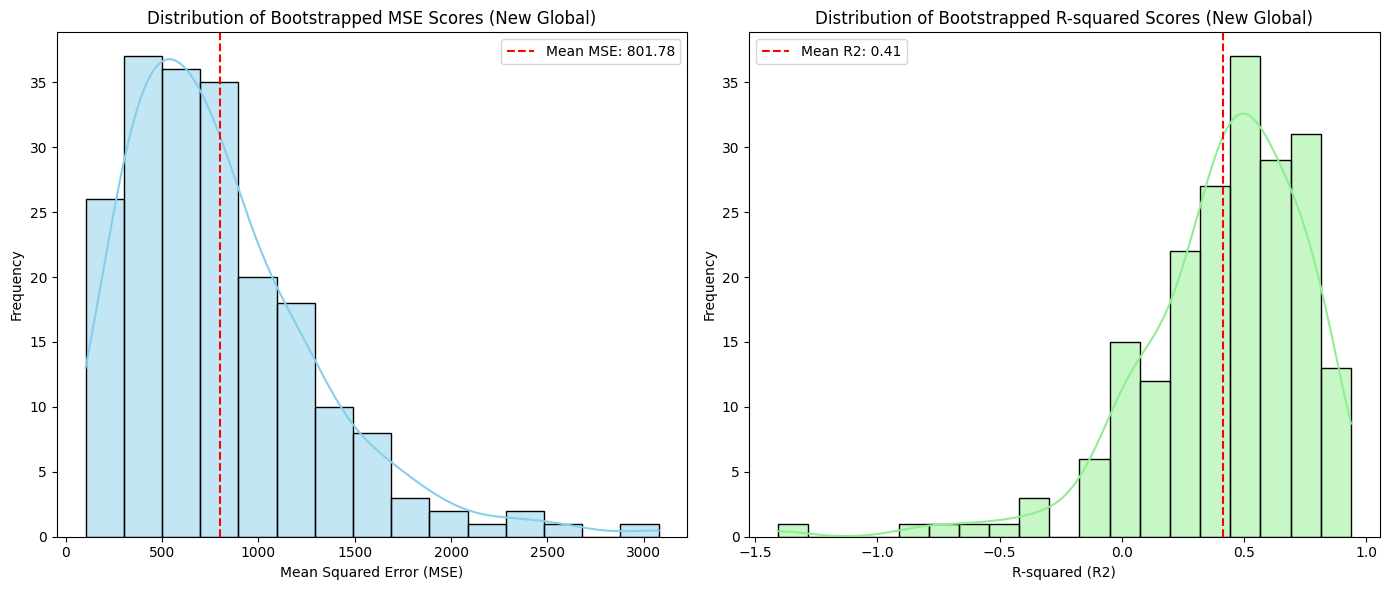

In [151]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize lists to store evaluation metrics for the new global dataframe
bootstrapped_mse_scores_new = []
bootstrapped_r2_scores_new = []

# Define the number of bootstrap iterations
n_iterations = 200

print(f"Starting {n_iterations} bootstrap iterations for the NEW global dataframe...")

# Loop for n_iterations
for i in range(n_iterations):
    # 1. Create a bootstrap sample of X_global_new and y_global_new by sampling with replacement
    # We need to combine X_global_new and y_global_new first to ensure corresponding rows are sampled together
    combined_df_new = X_global_new.copy()
    combined_df_new['AGCd_tC_per_ha_chave2014'] = y_global_new.values

    # Resample the combined dataframe
    bootstrap_sample_new = resample(combined_df_new, replace=True, n_samples=len(combined_df_new), random_state=i)

    # Split back into X_bootstrap_new and y_bootstrap_new
    X_bootstrap_new = bootstrap_sample_new.drop(columns=['AGCd_tC_per_ha_chave2014'])
    y_bootstrap_new = bootstrap_sample_new['AGCd_tC_per_ha_chave2014']

    # 2. Split the bootstrapped X and y into training and testing sets
    X_train_bootstrap_new, X_test_bootstrap_new, y_train_bootstrap_new, y_test_bootstrap_new = train_test_split(
        X_bootstrap_new, y_bootstrap_new, test_size=0.2, random_state=42
    )

    # 3. Instantiate a RandomForestRegressor model
    rf_model_bootstrap_new = RandomForestRegressor(n_estimators=100, random_state=42)

    # 4. Train the RandomForestRegressor model
    rf_model_bootstrap_new.fit(X_train_bootstrap_new, y_train_bootstrap_new)

    # 5. Make predictions on the bootstrapped test set
    y_pred_rf_bootstrap_new = rf_model_bootstrap_new.predict(X_test_bootstrap_new)

    # 6. Calculate the Mean Squared Error (MSE) and R-squared (R2)
    mse_new = mean_squared_error(y_test_bootstrap_new, y_pred_rf_bootstrap_new)
    r2_new = r2_score(y_test_bootstrap_new, y_pred_rf_bootstrap_new)

    # 7. Append the calculated scores to their respective lists
    bootstrapped_mse_scores_new.append(mse_new)
    bootstrapped_r2_scores_new.append(r2_new)

print("Bootstrapping complete for the NEW global dataframe.")
print(f"Total MSE scores collected: {len(bootstrapped_mse_scores_new)}")
print(f"Total R2 scores collected: {len(bootstrapped_r2_scores_new)}")

# Calculate summary statistics for bootstrapped MSE scores
mean_mse_new = np.mean(bootstrapped_mse_scores_new)
median_mse_new = np.median(bootstrapped_mse_scores_new)
std_mse_new = np.std(bootstrapped_mse_scores_new)

# Calculate 95% confidence interval for MSE
lower_ci_mse_new = np.percentile(bootstrapped_mse_scores_new, 2.5)
upper_ci_mse_new = np.percentile(bootstrapped_mse_scores_new, 97.5)

print(
    "\n--- Bootstrapped MSE Scores Summary for NEW global dataframe ---"
)
print(f"Mean MSE: {mean_mse_new:.2f}")
print(f"Median MSE: {median_mse_new:.2f}")
print(f"Standard Deviation MSE: {std_mse_new:.2f}")
print(
    f"95% Confidence Interval for MSE: [{lower_ci_mse_new:.2f}, {upper_ci_mse_new:.2f}]"
)

# Calculate summary statistics for bootstrapped R2 scores
mean_r2_new = np.mean(bootstrapped_r2_scores_new)
median_r2_new = np.median(bootstrapped_r2_scores_new)
std_r2_new = np.std(bootstrapped_r2_scores_new)

# Calculate 95% confidence interval for R2
lower_ci_r2_new = np.percentile(bootstrapped_r2_scores_new, 2.5)
upper_ci_r2_new = np.percentile(bootstrapped_r2_scores_new, 97.5)

print(
    "\n--- Bootstrapped R2 Scores Summary for NEW global dataframe ---"
)
print(f"Mean R2: {mean_r2_new:.2f}")
print(f"Median R2: {median_r2_new:.2f}")
print(f"Standard Deviation R2: {std_r2_new:.2f}")
print(
    f"95% Confidence Interval for R2: [{lower_ci_r2_new:.2f}, {upper_ci_r2_new:.2f}]"
)

# --- Visualizations ---
plt.figure(figsize=(14, 6))

# Histogram for MSE scores
plt.subplot(1, 2, 1)
sns.histplot(bootstrapped_mse_scores_new, kde=True, color='skyblue')
plt.axvline(mean_mse_new, color='red', linestyle='--', label=f'Mean MSE: {mean_mse_new:.2f}')
plt.title('Distribution of Bootstrapped MSE Scores (New Global)')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for R2 scores
plt.subplot(1, 2, 2)
sns.histplot(bootstrapped_r2_scores_new, kde=True, color='lightgreen')
plt.axvline(mean_r2_new, color='red', linestyle='--', label=f'Mean R2: {mean_r2_new:.2f}')
plt.title('Distribution of Bootstrapped R-squared Scores (New Global)')
plt.xlabel('R-squared (R2)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Summary: Boostrapped Global Model V2

The bootstrapping for the new global DataFrame (including Colombia, Panama, and Suriname SU data) has been successfully completed. Here's a summary of the Random Forest Regressor's performance:

*   The bootstrapping process successfully completed 200 iterations, with MSE and R2 scores collected for each, for a Random Forest Regressor trained on resampled `global_new_df`.  

Bootstrapped MSE Scores Summary for NEW global dataframe:
*   Mean MSE: 801.78  
*   Median MSE: 701.36  
*   Standard Deviation MSE: 500.90  
*   95% Confidence Interval for MSE: [183.52, 2027.09]  

Bootstrapped R2 Scores Summary for NEW global dataframe:  
*   Mean R2: 0.41  
*   Median R2: 0.46  
*   Standard Deviation R2: 0.34  
*   95% Confidence Interval for R2: [-0.38, 0.86]  

The results indicate a more variable performance compared to the previous global model (which excluded Suriname SU data), with a lower mean R2. The wide confidence intervals suggest that the model's performance can vary significantly depending on the data sample, highlighting the continued challenges of limited data. The generated plots visualize the distribution of these MSE and R2 scores, offering a clearer picture of the model's consistency.

**The previous global dataframe and bootstrap provided more stable / robust results.**

---

---

# About this Document

This report summarizes the methodology, findings, limitations, and future work for developing predictive models for Above-Ground Carbon Density (AGCd) in mangrove ecosystems in Colombia and Panama. The objective is to produce accurate, scalable, and reproducible carbon stock estimates to support countries’ Measurement, Reporting, and Verification (MRV) obligations.

## 1. Modeling Process

### Data Acquisition
Data was sourced from a GitHub repository, specifically for Colombia and Panama. For each country, three types of data files were obtained:
*   **S1 Predictors**: Contains features derived from Sentinel-1 Synthetic Aperture Radar (SAR) imagery, including VH polarization, VV polarization, VH/VV ratio, and VV minus VH.
*   **S2 Predictors**: Contains features derived from Sentinel-2 optical imagery, including various spectral bands (B2, B3, B4, B5, B6, B7, B8, B8A, B11, B12) and vegetation indices (EVI, NDRE, NDVI, NDWI).
*   **Plot AGB/AGC**: Contains ground-truth data from field plots, specifically Above-Ground Biomass (AGB) in kg/ha and t/ha, and Above-Ground Carbon Density (AGCd) in tC/ha (calculated using the Chave 2014 allometric equation).

### Data Preprocessing and Feature Selection
Data preprocessing involved several key steps:
1.  **Loading and Initial Inspection**: All Excel files were loaded into pandas DataFrames, and their basic information (`.info()`, `.describe()`, `.head()`, `.shape`) was inspected.
2.  **Merging Datasets**: For each country, the S1 Predictors, S2 Predictors, and Plot AGB/AGC DataFrames were merged based on a common 'Plot' identifier. This combined remote sensing features with ground-truth carbon density values.
3.  **Handling Redundancy**: Redundant columns (e.g., system indices, geo-coordinates from different sources, `.geo` columns) and unnecessary AGB columns (when AGCd was the target) were dropped to streamline the feature set.
4.  **Categorical Feature Encoding**: For the global model, a 'Country' column was added to each country-specific dataset. This categorical feature was then one-hot encoded (`Country_Panama`) before combining the datasets.
5.  **Data Splitting**: The preprocessed data for each country and the combined global dataset were split into features (X) and the target variable (y = 'AGCd_tC_per_ha_chave2014'). These were then further divided into training and testing sets using `train_test_split` with a `test_size` of 15% for Colombia and 20% for Panama and the Global model, and `random_state=42` for reproducibility.
6.  **Feature Scaling (for ANN)**: For Artificial Neural Network (ANN) models, input features were scaled using `StandardScaler` to normalize the data, which is crucial for the optimal performance of neural networks.

### Machine Learning Models Employed
A range of machine learning models were applied to predict AGCd:
1.  **Linear Regression**: A simple yet fundamental model to establish a baseline.
2.  **Decision Tree Regressor**: A non-linear model capable of capturing complex relationships.
3.  **XGBoost Regressor**: A powerful gradient boosting algorithm known for its performance and regularization capabilities.
4.  **Random Forest Regressor**: An ensemble method that builds multiple decision trees and merges their predictions to improve accuracy and control overfitting.
5.  **Ensemble Model (StackingRegressor)**: A meta-learner combining predictions from XGBoost and Random Forest as base estimators, with Linear Regression as the final estimator.
6.  **Artificial Neural Network (ANN)**: A deep learning model consisting of sequential layers with ReLU activation, compiled with 'adam' optimizer and 'mean_squared_error' loss.

## 2. Results

The models were evaluated using Mean Squared Error (MSE) and R-squared (R2) metrics.

### Colombia Model Performance
| Model                      | MSE      | R-squared (R2) |
| :------------------------- | :------- | :------------- |
| Linear Regression          | 1065.91  | -157.69        |
| Decision Tree Regressor    | 88.11    | -12.12         |
| **XGBoost Regressor**      | **28.14**| **-3.19**      |
| Random Forest Regressor    | 307.72   | -44.81         |
| Ensemble (StackingRegressor)| 271.51   | -39.42         |
| Artificial Neural Network (ANN) | 463.29 | -67.97         |

The **XGBoost Regressor** performed best for the Colombia dataset, achieving the lowest MSE (28.14) and the least negative R-squared (-3.19). All models showed poor predictive power, indicated by substantially negative R-squared values.

### Panama Model Performance
| Model                      | MSE      | R-squared (R2) |
| :------------------------- | :------- | :------------- |
| Linear Regression          | 4664.09  | -4.88          |
| **Decision Tree Regressor**| **785.92**| **0.01**       |
| XGBoost Regressor          | 1493.00  | -0.88          |
| Random Forest Regressor    | 1078.76  | -0.36          |
| Ensemble (StackingRegressor)| 1159.86  | -0.46          |
| Artificial Neural Network (ANN) | 1474.84 | -0.86         |

For the Panama dataset, the **Decision Tree Regressor** was the best performer, uniquely achieving a slightly positive R-squared (0.01), though still indicating very low explanatory power. Its MSE was also the lowest (785.92) among all models for Panama.

### Global Model Performance
| Model                      | MSE      | R-squared (R2) |
| :------------------------- | :------- | :------------- |
| Linear Regression          | 2999.82  | -1.03          |
| Decision Tree Regressor    | 2624.51  | -0.78          |
| XGBoost Regressor          | 1639.72  | -0.11          |
| **Random Forest Regressor**| **1126.79**| **0.24**       |
| Ensemble (StackingRegressor)| 1431.92  | 0.03           |
| Artificial Neural Network (ANN) | 1976.28 | -0.34         |

The **Random Forest Regressor** exhibited the best performance for the combined global dataset, with an R-squared of 0.24 and an MSE of 1126.79. While still a modest R-squared, it represents the highest predictive capability across all models and datasets in this analysis.

## 3. Limitations

The primary limitations of this analysis are:

1.  **Limited Dataset Size**: The most significant constraint is the extremely small size of the datasets.
    *   **Colombia**: 11 training samples and 3 test samples. This is insufficient for any complex model to learn meaningful patterns and generalize effectively.
    *   **Panama**: 32 training samples and 9 test samples. While larger than Colombia, this is still a very small dataset for robust machine learning, particularly for models like ANNs that typically require vast amounts of data.
    *   **Global**: 44 training samples and 11 test samples. The combined dataset offers only a marginal improvement in size, still far from what is typically needed.
    Small datasets inherently lead to high variance in model performance and make it difficult to derive reliable conclusions.

2.  **Negative or Low R-squared Values**: The prevalence of negative and very low positive R-squared values across almost all models and datasets indicates that the models are performing worse than simply predicting the mean of the target variable. This implies:
    *   **Poor Model Fit**: The models are not adequately capturing the variance in the AGCd data.
    *   **Lack of Generalizability**: Models trained on such limited and potentially noisy data are unlikely to generalize well to unseen data, making their practical application unreliable.
    *   **Data Insufficiency**: The features, despite being derived from remote sensing, might not be sufficiently informative or diverse enough, given the small sample size, to explain the variation in AGCd.

3.  **Potential for Overfitting (Despite Poor Performance)**: With very few samples, even simple models can perfectly memorize the training data but fail drastically on unseen data. The reported R-squared values on the test set already reflect this poor generalization.

## 4. Future Work

To enhance model performance, robustness, and reliability, the following steps are proposed:

1.  **Data Augmentation and Acquisition**:
    *   **Increase Field Data**: Prioritize acquiring significantly more ground-truth field plot data across a wider range of mangrove conditions and geographical locations within Colombia and Panama. This is the most crucial step.
    *   **Leverage Auxiliary Data**: Explore additional publicly available or proprietary datasets that might offer more features (e.g., historical data, climate variables, soil properties, topographic data like DEM/slope/aspect, other SAR/optical indices).
    *   **Synthetic Data Generation**: Investigate techniques for generating synthetic but realistic data points if real data acquisition is severely limited.

2.  **Advanced Feature Engineering**:
    *   **Domain-Specific Features**: Collaborate with mangrove ecologists and remote sensing experts to derive more ecologically relevant features from SAR and optical imagery (e.g., texture features from SAR, canopy height proxies from LiDAR where available, specific spectral indices known to correlate with biomass in mangroves).
    *   **Temporal Features**: If multi-temporal remote sensing data is available, consider extracting features related to changes over time (e.g., seasonal variations, growth rates).

3.  **Comprehensive Hyperparameter Optimization**:
    *   **Systematic Tuning**: Implement advanced hyperparameter tuning strategies (e.g., GridSearchCV, RandomizedSearchCV, Bayesian Optimization) combined with robust cross-validation (see next point) for all models, especially tree-based and ANN models.
    *   **Model Selection**: Explore a wider array of advanced regression models, including Gaussian Process Regression, Support Vector Regression, or specialized ensemble methods, once a larger dataset is available.

4.  **Rigorous Cross-Validation Techniques**:
    *   **K-Fold Cross-Validation**: Given the current small dataset size, K-Fold Cross-Validation (e.g., 5-fold or 10-fold) should be implemented during model training and evaluation to obtain more stable and reliable performance estimates.
    *   **Leave-One-Out Cross-Validation (LOOCV)**: If computational resources allow and the dataset remains small, LOOCV can provide an almost unbiased estimate of model performance.
    *   **Spatial Cross-Validation**: If there are spatial dependencies in the data, consider spatial cross-validation to ensure the model generalizes well to new geographical areas.

5.  **Model Interpretability and Uncertainty Quantification**:
    *   **Feature Importance**: Analyze and visualize feature importances for tree-based models (e.g., Random Forest, XGBoost) to understand which remote sensing variables are most influential in predicting AGCd. This can guide future data collection and feature engineering efforts.
    *   **Uncertainty Estimates**: Develop methods to quantify the uncertainty associated with the predictions, which is crucial for MRV reporting. This could involve Bayesian methods or ensemble techniques that provide prediction intervals.

6.  **Outlier Detection and Handling**: Conduct a thorough analysis for outliers and influential data points, especially with small datasets, as they can disproportionately affect model training and evaluation.

By addressing these limitations and implementing the proposed future work, the accuracy, reliability, and scalability of the blue carbon stock estimation models can be significantly improved, better supporting MRV obligations and sustainable carbon management.